# Data Cleaning and Wrangling

In [125]:
from notebook.services.config import ConfigManager
cm = ConfigManager().update('notebook', {'limit_output': 10000})

In [126]:
#importing libriares
import pandas as pd
import numpy as np
import seaborn as sns

In [127]:
#importing loan dataset
raw_data = pd.read_csv("LoanData_Bondora.csv", low_memory=False)

In [128]:
#Checking data shape
raw_data.shape

(179235, 112)

In [129]:
#Removing columns with all data values = null
raw_data = raw_data.dropna(axis=1, how='all')

In [130]:
#Check data shape again
raw_data.shape

(179235, 108)

In [131]:
#Removing rows with all data values = null
raw_data = raw_data.dropna(how='all')

In [132]:
#Check data shape again
raw_data.shape

(179235, 108)

In [133]:
#Removing duplicate rows
raw_data = raw_data.drop_duplicates()

In [134]:
#Check data shape again
raw_data.shape

(179235, 108)

In [135]:
#Getting all the column names
column_names = raw_data.columns.values.tolist()

In [136]:
#Sorting the column names for easier review
sorted(column_names)

['ActiveLateCategory',
 'ActiveLateLastPaymentCategory',
 'ActiveScheduleFirstPaymentReached',
 'Age',
 'Amount',
 'AmountOfPreviousLoansBeforeLoan',
 'ApplicationSignedHour',
 'ApplicationSignedWeekday',
 'AppliedAmount',
 'BiddingStartedOn',
 'BidsApi',
 'BidsManual',
 'BidsPortfolioManager',
 'ContractEndDate',
 'Country',
 'CreditScoreEeMini',
 'CreditScoreEsEquifaxRisk',
 'CreditScoreEsMicroL',
 'CreditScoreFiAsiakasTietoRiskGrade',
 'CurrentDebtDaysPrimary',
 'CurrentDebtDaysSecondary',
 'DebtOccuredOn',
 'DebtOccuredOnForSecondary',
 'DebtToIncome',
 'DefaultDate',
 'EAD1',
 'EAD2',
 'EL_V0',
 'EL_V1',
 'Education',
 'EmploymentDurationCurrentEmployer',
 'EmploymentStatus',
 'ExistingLiabilities',
 'ExpectedLoss',
 'ExpectedReturn',
 'FirstPaymentDate',
 'FreeCash',
 'Gender',
 'GracePeriodEnd',
 'GracePeriodStart',
 'HomeOwnershipType',
 'IncomeFromChildSupport',
 'IncomeFromFamilyAllowance',
 'IncomeFromLeavePay',
 'IncomeFromPension',
 'IncomeFromPrincipalEmployer',
 'IncomeF

In [137]:
# number of unique observations per column
unique_observations = raw_data.nunique()

In [138]:
pd.set_option('display.max_rows', 500) 

unique_observations.sort_values()

ReportAsOfEOD                                  1
Restructured                                   2
NewCreditCustomer                              2
ActiveScheduleFirstPaymentReached              2
RecoveryStage                                  2
Gender                                         3
Status                                         3
Country                                        4
VerificationType                               5
CreditScoreEsEquifaxRisk                       6
WorkExperience                                 6
MaritalStatus                                  7
EmploymentStatus                               7
ApplicationSignedWeekday                       7
Education                                      7
CreditScoreEeMini                              7
Rating_V0                                      8
Rating_V1                                      8
Rating_V2                                      8
ModelVersion                                   8
Rating              

In [139]:
#Column ReportAsOfEOD has only one value and will therefore not be useful to the model
raw_data.drop('ReportAsOfEOD', axis=1, inplace=True)

In [140]:
#Some variables which will not contribute to the model needs to be removed
raw_data.drop(['LoanId','LoanNumber','UserName'],axis=1, inplace=True)

In [141]:
# data frame shape
print('Number of rows: ', raw_data.shape[0])
print('Number of columns: ', raw_data.shape[1])

Number of rows:  179235
Number of columns:  104


In [142]:
# percentage of missing values per feature

pd.set_option('display.max_rows', 500) 

print((raw_data.isnull().sum() * 100 / raw_data.shape[0]).sort_values(ascending=False))

EL_V0                                     97.450833
Rating_V0                                 97.450833
CreditScoreEsEquifaxRisk                  93.182693
Rating_V1                                 92.789355
EL_V1                                     92.789355
Rating_V2                                 85.972048
NrOfDependants                            80.137808
WorkExperience                            79.623399
CreditScoreFiAsiakasTietoRiskGrade        76.663040
GracePeriodStart                          76.631238
GracePeriodEnd                            76.631238
PlannedPrincipalTillDate                  69.613078
PreviousEarlyRepaymentsBefoleLoan         67.146484
ReScheduledOn                             64.826066
NextPaymentDate                           63.388289
EAD1                                      60.156219
EAD2                                      60.156219
PrincipalRecovery                         60.155662
PlannedPrincipalPostDefault               60.155662
PlannedInter

In [143]:
#Dropping all featuires with > 70% null values
raw_data.drop(['EL_V0','Rating_V0','CreditScoreEsEquifaxRisk','Rating_V1','EL_V1',
              'Rating_V2','NrOfDependants','WorkExperience','CreditScoreFiAsiakasTietoRiskGrade',
              'GracePeriodStart','GracePeriodEnd'],axis=1, inplace=True)

In [144]:
# data frame shape
print('Number of rows: ', raw_data.shape[0])
print('Number of columns: ', raw_data.shape[1])

Number of rows:  179235
Number of columns:  93


In [145]:
#Check variable types
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 179235 entries, 0 to 179234
Data columns (total 93 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   ListedOnUTC                             179235 non-null  object 
 1   BiddingStartedOn                        179235 non-null  object 
 2   BidsPortfolioManager                    179235 non-null  int64  
 3   BidsApi                                 179235 non-null  int64  
 4   BidsManual                              179235 non-null  float64
 5   NewCreditCustomer                       179235 non-null  bool   
 6   LoanApplicationStartedDate              179235 non-null  object 
 7   LoanDate                                179235 non-null  object 
 8   ContractEndDate                         102996 non-null  object 
 9   FirstPaymentDate                        179235 non-null  object 
 10  MaturityDate_Original                   1792

In [146]:
#Data type count for subset data 
raw_data.dtypes.value_counts()

float64    53
object     23
int64      14
bool        3
dtype: int64

In [147]:
# show descriptive statistics on numerical features
pd.set_option('display.max_columns', 500) 
raw_data.describe()

BidsPortfolioManager        BidsApi     BidsManual  \
count         179235.000000  179235.000000  179235.000000   
mean             797.962530      27.432337     499.544776   
std             1235.509764     147.568318     714.723996   
min                0.000000       0.000000       0.000000   
25%              105.000000       0.000000      50.000000   
50%              336.000000       0.000000     258.000000   
75%              960.000000       4.000000     639.116700   
max            10625.000000    7570.000000   10630.000000   

       ApplicationSignedHour  ApplicationSignedWeekday  VerificationType  \
count          179235.000000             179235.000000     179185.000000   
mean               13.325260                  3.917907          3.043402   
std                 4.995317                  1.752335          1.352504   
min                 0.000000                  1.000000          0.000000   
25%                10.000000                  2.000000          1.000000   
50%                13.000000                  4.000000          4.000000   
75%                17.000000                  5.000000          4.000000   
max                23.000000                  7.000000          4.000000   

        LanguageCode            Age         Gender  AppliedAmount  \
count  179235.000000  179235.000000  179190.000000  179235.000000   
mean        2.675153      40.389137       0.466801    2699.127966   
std         1.874840      12.359547       0.620359    2342.758228   
min         1.000000       0.000000       0.000000      10.000000   
25%         1.000000      31.000000       0.000000     740.000000   
50%         2.000000      39.000000       0.000000    2125.000000   
75%         4.000000      49.000000       1.000000    4150.000000   
max        22.000000      77.000000       2.000000   10632.000000   

              Amount       Interest   LoanDuration  MonthlyPayment  \
count  179235.000000  179235.000000  179235.000000   172545.000000   
mean     2543.473023      34.345889      47.324747      112.899170   
std      2182.064156      23.795960      15.370251      107.550798   
min         6.390000       2.000000       1.000000        0.000000   
25%       740.000000      19.410000      36.000000       32.850000   
50%      2125.000000      30.000000      60.000000       90.890000   
75%      3825.000000      39.800000      60.000000      151.770000   
max     10632.000000     264.310000      60.000000     2368.540000   

           UseOfLoan      Education  MaritalStatus  EmploymentStatus  \
count  179235.000000  179185.000000  179185.000000     179033.000000   
mean        0.008213       3.589385      -0.331401         -0.134344   
std         2.927697       1.242256       1.401546          1.753554   
min        -1.000000      -1.000000      -1.000000         -1.000000   
25%        -1.000000       3.000000      -1.000000         -1.000000   
50%        -1.000000       4.000000      -1.000000         -1.000000   
75%        -1.000000       4.000000      -1.000000         -1.000000   
max       110.000000       5.000000       5.000000          6.000000   

       OccupationArea  HomeOwnershipType  IncomeFromPrincipalEmployer  \
count   179144.000000      177578.000000                179235.000000   
mean         0.787411           3.318863                   328.108139   
std          4.351426           2.896185                  1559.318762   
min         -1.000000          -1.000000                     0.000000   
25%         -1.000000           1.000000                     0.000000   
50%         -1.000000           2.000000                     0.000000   
75%         -1.000000           3.000000                     0.000000   
max         19.000000          10.000000                228400.000000   

       IncomeFromPension  IncomeFromFamilyAllowance  IncomeFromSocialWelfare  \
count      179235.000000              179235.000000            179235.000000   
mean           14.112803                   4.265394 

In [148]:
pd.set_option('display.max_columns', 500) 
raw_data.head(10)

ListedOnUTC  BiddingStartedOn  BidsPortfolioManager  BidsApi  \
0  23/03/2016 16:07  23/03/2016 16:07                   970     1150   
1  25/06/2015 11:02  25/06/2015 11:02                  1295        0   
2  14/01/2016 10:00  14/01/2016 10:00                  2700      565   
3  24/03/2015 15:55  24/03/2015 15:55                  1115        0   
4  17/12/2015 10:12  17/12/2015 10:12                   305        0   
5  13/11/2015 14:08  13/11/2015 14:08                   600        0   
6  29/02/2016 14:24  29/02/2016 14:24                   635        0   
7  25/03/2015 16:39  25/03/2015 16:39                   295        0   
8  09/03/2015 15:09  09/03/2015 15:09                  4000        0   
9  29/04/2015 12:19  29/04/2015 12:19                  3790        0   

   BidsManual  NewCreditCustomer LoanApplicationStartedDate    LoanDate  \
0         5.0              False           17/03/2016 12:39  23/03/2016   
1      1705.0              False           24/06/2015 12:36  25/06/2015   
2      5835.0               True           07/01/2016 15:37  19/01/2016   
3       385.0               True           20/03/2015 15:20  27/03/2015   
4       785.0               True           13/12/2015 00:30  22/12/2015   
5       175.0               True           12/11/2015 12:58  19/11/2015   
6         0.0               True           29/02/2016 10:25  29/02/2016   
7       705.0               True           17/03/2015 08:25  01/04/2015   
8         0.0               True           02/03/2015 12:36  13/03/2015   
9      1210.0              False           23/04/2015 18:38  05/05/2015   

  ContractEndDate FirstPaymentDate MaturityDate_Original MaturityDate_Last  \
0      26/06/2020       12/05/2016            12/04/2021        26/06/2020   
1             NaN       17/08/2015            17/07/2020        17/07/2020   
2      24/10/2019       22/02/2016            20/01/2021        20/01/2021   
3             NaN       04/05/2015            01/04/2020        01/04/2020   
4             NaN       01/02/2016            02/01/2020        02/01/2020   
5             NaN       04/01/2016            01/12/2020        01/12/2020   
6      13/07/2018       15/04/2016            15/03/2021        12/06/2019   
7      26/04/2016       25/05/2015            25/04/2016        25/04/2016   
8      14/09/2016       15/04/2015            15/03/2018        20/05/2021   
9      14/05/2020       22/06/2015            20/05/2020        20/05/2020   

   ApplicationSignedHour  ApplicationSignedWeekday  VerificationType  \
0                     17                         4               4.0   
1                     11                         5               1.0   
2                     22                         3               4.0   
3                     15                         3               3.0   
4                     20                         3               4.0   
5                      0                         5               4.0   
6                     15                         2               3.0   
7                     16                         4               1.0   
8                     10                         2               4.0   
9                     12                         4               1.0   

   LanguageCode  Age  Gender Country  AppliedAmount  Amount  Interest  \
0             1   53     1.0      EE         2125.0  2125.0     20.97   
1             1   50     1.0      EE         3000.0  3000.0     17.12   
2             1   44     0.0      EE        10630.0  9100.0     13.67   
3             6   42     0.0      ES         1500.0  1500.0     40.40   
4             6   34     1.0      ES         1595.0  1090.0     68.39   
5             6   31     1.0      ES         3720.0   775.0     73.73   
6             1   22     0.0      EE          635.0   635.0     42.66   
7             6   47     0.0      ES         1000.0  1000.0     61.49   
8             4   60     0.0      FI         4000.0  4000.0     31.01   
9      

In [149]:
# From the numerical data description, the features 
# EmploymentStatus,MaritalStatus, OccupationArea, UseOfLoan are supposed to be categorical variables
raw_data['EmploymentStatus']= raw_data['EmploymentStatus'].astype('object')
raw_data['OccupationArea']= raw_data['OccupationArea'].astype('object')
raw_data['MaritalStatus']= raw_data['MaritalStatus'].astype('object')
raw_data['UseOfLoan']= raw_data['UseOfLoan'].astype('object')

In [150]:
#Doing same for variables VerificationType, LanguageCode, Gender, Education, HomeOwnershipType,CreditScoreEeMini

raw_data['VerificationType']= raw_data['VerificationType'].astype('object')
raw_data['LanguageCode']=    raw_data['LanguageCode'].astype('object')
raw_data['Gender']=    raw_data['Gender'].astype('object')
raw_data['Education']= raw_data['Education'].astype('object')
raw_data['HomeOwnershipType']= raw_data['HomeOwnershipType'].astype('object')
raw_data['CreditScoreEeMini']= raw_data['CreditScoreEeMini'].astype('object')

In [151]:
raw_data['RecoveryStage']= raw_data['RecoveryStage'].astype('object')

In [152]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 179235 entries, 0 to 179234
Data columns (total 93 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   ListedOnUTC                             179235 non-null  object 
 1   BiddingStartedOn                        179235 non-null  object 
 2   BidsPortfolioManager                    179235 non-null  int64  
 3   BidsApi                                 179235 non-null  int64  
 4   BidsManual                              179235 non-null  float64
 5   NewCreditCustomer                       179235 non-null  bool   
 6   LoanApplicationStartedDate              179235 non-null  object 
 7   LoanDate                                179235 non-null  object 
 8   ContractEndDate                         102996 non-null  object 
 9   FirstPaymentDate                        179235 non-null  object 
 10  MaturityDate_Original                   1792

In [153]:
raw_data.dtypes.value_counts()

float64    44
object     34
int64      12
bool        3
dtype: int64

In [154]:
# Looking at the descriptive statistics on numerical features
pd.set_option('display.max_columns', 500) 
raw_data.describe()

BidsPortfolioManager        BidsApi     BidsManual  \
count         179235.000000  179235.000000  179235.000000   
mean             797.962530      27.432337     499.544776   
std             1235.509764     147.568318     714.723996   
min                0.000000       0.000000       0.000000   
25%              105.000000       0.000000      50.000000   
50%              336.000000       0.000000     258.000000   
75%              960.000000       4.000000     639.116700   
max            10625.000000    7570.000000   10630.000000   

       ApplicationSignedHour  ApplicationSignedWeekday            Age  \
count          179235.000000             179235.000000  179235.000000   
mean               13.325260                  3.917907      40.389137   
std                 4.995317                  1.752335      12.359547   
min                 0.000000                  1.000000       0.000000   
25%                10.000000                  2.000000      31.000000   
50%                13.000000                  4.000000      39.000000   
75%                17.000000                  5.000000      49.000000   
max                23.000000                  7.000000      77.000000   

       AppliedAmount         Amount       Interest   LoanDuration  \
count  179235.000000  179235.000000  179235.000000  179235.000000   
mean     2699.127966    2543.473023      34.345889      47.324747   
std      2342.758228    2182.064156      23.795960      15.370251   
min        10.000000       6.390000       2.000000       1.000000   
25%       740.000000     740.000000      19.410000      36.000000   
50%      2125.000000    2125.000000      30.000000      60.000000   
75%      4150.000000    3825.000000      39.800000      60.000000   
max     10632.000000   10632.000000     264.310000      60.000000   

       MonthlyPayment  IncomeFromPrincipalEmployer  IncomeFromPension  \
count   172545.000000                179235.000000      179235.000000   
mean       112.899170                   328.108139          14.112803   
std        107.550798                  1559.318762         130.942266   
min          0.000000                     0.000000           0.000000   
25%         32.850000                     0.000000           0.000000   
50%         90.890000                     0.000000           0.000000   
75%        151.770000                     0.000000           0.000000   
max       2368.540000                228400.000000        5038.000000   

       IncomeFromFamilyAllowance  IncomeFromSocialWelfare  IncomeFromLeavePay  \
count              179235.000000            179235.000000       179235.000000   
mean                    4.265394                 1.793874            2.441794   
std                    33.346613                31.891023           67.177892   
min                     0.000000                 0.000000            0.000000   
25%                     0.000000                 0.000000            0.000000   
50%                     0.000000                 0.000000            0.000000   
75%                     0.000000                 0.000000            0.000000   
max                  2006.000000              4551.000000        21300.000000   

       IncomeFromChildSupport    IncomeOther   IncomeTotal  \
count           179235.000000  179235.000000  1.792350e+05   
mean                 1.770709      32.359334  1.763368e+03   
std                 24.677558     398.164945  8.127176e+03   
min                  0.000000       0.000000  0.000000e+00   
25%                  0.000000       0.000000  8.740000e+02   
50%                  0.000000       0.000000  1.230000e+03   
75%                  0.000000       0.000000  1.900000e+03   
max               2500.000000   50000.000000  1.012019e+06   

       ExistingLiabilities  LiabilitiesTotal  RefinanceLiabilities  \
count        179235.000000      1.792350e+05         179235.000000   
mean              2.937562      4.908981e+02              0.140592   
std               3.

In [155]:
#Selecting only numerical columns
raw_data_numerical = raw_data.select_dtypes('number')

In [156]:
raw_data_numerical.shape

(179235, 56)

In [157]:
raw_data_numerical_unique = raw_data_numerical.nunique()

In [158]:
raw_data_numerical_unique

BidsPortfolioManager                       5803
BidsApi                                    1286
BidsManual                                 4461
ApplicationSignedHour                        24
ApplicationSignedWeekday                      7
Age                                          62
AppliedAmount                              1166
Amount                                     6274
Interest                                   6966
LoanDuration                                 32
MonthlyPayment                            27295
IncomeFromPrincipalEmployer                2922
IncomeFromPension                          1113
IncomeFromFamilyAllowance                   339
IncomeFromSocialWelfare                     401
IncomeFromLeavePay                          367
IncomeFromChildSupport                      193
IncomeOther                                 583
IncomeTotal                                4459
ExistingLiabilities                          39
LiabilitiesTotal                        

In [159]:
# Variable type
type(raw_data_numerical_unique)

pandas.core.series.Series

In [160]:
# Checking for numerical features with low variance

for index, value in raw_data_numerical_unique.items():
    percentage = (float(value) / 179235) * 100
    print('%s, %d, %.3f%%' % (index, value, percentage))
    

BidsPortfolioManager, 5803, 3.238%
BidsApi, 1286, 0.717%
BidsManual, 4461, 2.489%
ApplicationSignedHour, 24, 0.013%
ApplicationSignedWeekday, 7, 0.004%
Age, 62, 0.035%
AppliedAmount, 1166, 0.651%
Amount, 6274, 3.500%
Interest, 6966, 3.887%
LoanDuration, 32, 0.018%
MonthlyPayment, 27295, 15.229%
IncomeFromPrincipalEmployer, 2922, 1.630%
IncomeFromPension, 1113, 0.621%
IncomeFromFamilyAllowance, 339, 0.189%
IncomeFromSocialWelfare, 401, 0.224%
IncomeFromLeavePay, 367, 0.205%
IncomeFromChildSupport, 193, 0.108%
IncomeOther, 583, 0.325%
IncomeTotal, 4459, 2.488%
ExistingLiabilities, 39, 0.022%
LiabilitiesTotal, 58954, 32.892%
RefinanceLiabilities, 21, 0.012%
DebtToIncome, 6789, 3.788%
FreeCash, 23658, 13.199%
MonthlyPaymentDay, 29, 0.016%
PlannedPrincipalTillDate, 30407, 16.965%
PlannedInterestTillDate, 71715, 40.012%
CurrentDebtDaysPrimary, 1881, 1.049%
CurrentDebtDaysSecondary, 1905, 1.063%
ExpectedLoss, 30091, 16.789%
LossGivenDefault, 3405, 1.900%
ExpectedReturn, 46480, 25.932%
Probabi

In [161]:
# Features with variance less than 0.5 
# These features needed to be scrutinized along with their percentage of missing values 
# so as to remove unnecessary features


for index, value in raw_data_numerical_unique.items():
    percentage = (float(value) / 179235) * 100
    if percentage < 0.5:
        print('%s, %d, %.3f%%' % (index, value, percentage))   

ApplicationSignedHour, 24, 0.013%
ApplicationSignedWeekday, 7, 0.004%
Age, 62, 0.035%
LoanDuration, 32, 0.018%
IncomeFromFamilyAllowance, 339, 0.189%
IncomeFromSocialWelfare, 401, 0.224%
IncomeFromLeavePay, 367, 0.205%
IncomeFromChildSupport, 193, 0.108%
IncomeOther, 583, 0.325%
ExistingLiabilities, 39, 0.022%
RefinanceLiabilities, 21, 0.012%
MonthlyPaymentDay, 29, 0.016%
ModelVersion, 8, 0.004%
NoOfPreviousLoansBeforeLoan, 28, 0.016%
PreviousEarlyRepaymentsBefoleLoan, 570, 0.318%
PreviousEarlyRepaymentsCountBeforeLoan, 11, 0.006%
NextPaymentNr, 61, 0.034%
NrOfScheduledPayments, 72, 0.040%


In [162]:
raw_data_numerical.shape

(179235, 56)

In [163]:
!pip install sklearn

You should consider upgrading via the 'C:\Users\User\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [164]:
# Using the threshold variance
from sklearn.feature_selection import VarianceThreshold

transform = VarianceThreshold()
raw_data_numerical_variance = transform.fit_transform(raw_data_numerical)
print(raw_data_numerical_variance.shape)

(179235, 56)


In [165]:
from numpy import arange

thresholds = arange(0.0, 1.0, 0.05)
results = list()

for t in thresholds:
    transform = VarianceThreshold(threshold=t)
    raw_data_numerical_variance_thres = transform.fit_transform(raw_data_numerical)
    n_features = raw_data_numerical_variance_thres.shape[1]
    print('>Threshold=%.2f, Features=%d' % (t, n_features))
    results.append(n_features)

>Threshold=0.00, Features=56
>Threshold=0.05, Features=53
>Threshold=0.10, Features=52
>Threshold=0.15, Features=51
>Threshold=0.20, Features=51
>Threshold=0.25, Features=51
>Threshold=0.30, Features=51
>Threshold=0.35, Features=51
>Threshold=0.40, Features=51
>Threshold=0.45, Features=51
>Threshold=0.50, Features=51
>Threshold=0.55, Features=51
>Threshold=0.60, Features=51
>Threshold=0.65, Features=50
>Threshold=0.70, Features=50
>Threshold=0.75, Features=50
>Threshold=0.80, Features=50
>Threshold=0.85, Features=50
>Threshold=0.90, Features=50
>Threshold=0.95, Features=50


In [166]:
from sklearn.feature_selection import VarianceThreshold

transform = VarianceThreshold(threshold = 1.0)

raw_data_numerical_variance_thres_one = transform.fit_transform(raw_data_numerical)

print(raw_data_numerical_variance_thres_one.shape)

(179235, 50)


In [167]:
from sklearn.feature_selection import VarianceThreshold

transform = VarianceThreshold(threshold = 1.0)

raw_data_numerical_variance_thres_one = transform.fit(raw_data_numerical)

raw_data_numerical[raw_data_numerical.columns[transform.get_support(indices=True)]] 

BidsPortfolioManager  BidsApi  BidsManual  ApplicationSignedHour  \
0                        970     1150         5.0                     17   
1                       1295        0      1705.0                     11   
2                       2700      565      5835.0                     22   
3                       1115        0       385.0                     15   
4                        305        0       785.0                     20   
...                      ...      ...         ...                    ...   
179230                  2000        0         0.0                      7   
179231                  6215       70      1155.0                     11   
179232                   430        0      1055.0                     14   
179233                  3000        0         0.0                     20   
179234                     0        0      1300.0                     10   

        ApplicationSignedWeekday  Age  AppliedAmount  Amount  Interest  \
0                              4   53         2125.0  2125.0     20.97   
1                              5   50         3000.0  3000.0     17.12   
2                              3   44        10630.0  9100.0     13.67   
3                              3   42         1500.0  1500.0     40.40   
4                              3   34         1595.0  1090.0     68.39   
...                          ...  ...            ...     ...       ...   
179230                         2   38         2000.0  2000.0     33.79   
179231                         5   37         7440.0  7440.0     24.52   
179232                         4   37         1595.0  1485.0     64.51   
179233                         2   58         3000.0  3000.0     21.62   
179234                         2   64         1300.0  1300.0     16.38   

        LoanDuration  MonthlyPayment  IncomeFromPrincipalEmployer  \
0                 60           62.05                          0.0   
1                 60           84.75                        900.0   
2                 60          268.57                        600.0   
3                 60           63.53                        863.0   
4                 48          101.19                          0.0   
...              ...             ...                          ...   
179230            60           76.11                       1500.0   
179231            60          232.40                       2172.0   
179232            60           93.08                       1550.0   
179233            60           88.71                        350.0   
179234            48           41.42                        557.0   

        IncomeFromPension  IncomeFromFamilyAllowance  IncomeFromSocialWelfare  \
0                   301.0                        0.0                       53   
1                     0.0                        0.0                        0   
2                     0.0                        0.0                        0   
3                     0.0                        0.0                        0   
4                   697.0                        0.0                        0   
...                   ...                        ...                      ...   
179230                0.0                        0.0                        0   
179231                0.0                        0.0                        0   
179232                0.0                        0.0                        0   
179233                0.0                        0.0                        0   
179234              310.0                        0.0                        0   

        IncomeFromLeavePay  IncomeFromChildSupport  IncomeOther  IncomeTotal  \
0                        0                       0          0.0        354.0   
1                        0                       0          0.0        900.0   
2                        0                       0        600.0       1200.0   
3                        0                       0          0.0        863.0   
4   

In [168]:
before_variance = sorted(raw_data_numerical.columns)

In [169]:
from sklearn.feature_selection import VarianceThreshold
from itertools import compress

def fs_variance(df, threshold=1.0):
    """
    Return a list of selected variables based on the threshold.
    """

    # The list of columns in the data frame
    features = list(df.columns)
    
    # Initialize and fit the method
    vt = VarianceThreshold(threshold = threshold)
    _ = vt.fit(df)
    
    # Get column names which pass the threshold
    feat_select = list(compress(features, vt.get_support()))
    
    return feat_select

Removing outliers will delete majority of the data so its better to leave it at the moment

In [170]:
before_variance

['Age',
 'Amount',
 'AmountOfPreviousLoansBeforeLoan',
 'ApplicationSignedHour',
 'ApplicationSignedWeekday',
 'AppliedAmount',
 'BidsApi',
 'BidsManual',
 'BidsPortfolioManager',
 'CurrentDebtDaysPrimary',
 'CurrentDebtDaysSecondary',
 'DebtToIncome',
 'EAD1',
 'EAD2',
 'ExistingLiabilities',
 'ExpectedLoss',
 'ExpectedReturn',
 'FreeCash',
 'IncomeFromChildSupport',
 'IncomeFromFamilyAllowance',
 'IncomeFromLeavePay',
 'IncomeFromPension',
 'IncomeFromPrincipalEmployer',
 'IncomeFromSocialWelfare',
 'IncomeOther',
 'IncomeTotal',
 'Interest',
 'InterestAndPenaltyBalance',
 'InterestAndPenaltyDebtServicingCost',
 'InterestAndPenaltyPaymentsMade',
 'InterestAndPenaltyWriteOffs',
 'InterestRecovery',
 'LiabilitiesTotal',
 'LoanDuration',
 'LossGivenDefault',
 'ModelVersion',
 'MonthlyPayment',
 'MonthlyPaymentDay',
 'NextPaymentNr',
 'NoOfPreviousLoansBeforeLoan',
 'NrOfScheduledPayments',
 'PlannedInterestPostDefault',
 'PlannedInterestTillDate',
 'PlannedPrincipalPostDefault',
 'Plann

In [171]:
sorted(fs_variance(raw_data_numerical))

['Age',
 'Amount',
 'AmountOfPreviousLoansBeforeLoan',
 'ApplicationSignedHour',
 'ApplicationSignedWeekday',
 'AppliedAmount',
 'BidsApi',
 'BidsManual',
 'BidsPortfolioManager',
 'CurrentDebtDaysPrimary',
 'CurrentDebtDaysSecondary',
 'DebtToIncome',
 'EAD1',
 'EAD2',
 'ExistingLiabilities',
 'FreeCash',
 'IncomeFromChildSupport',
 'IncomeFromFamilyAllowance',
 'IncomeFromLeavePay',
 'IncomeFromPension',
 'IncomeFromPrincipalEmployer',
 'IncomeFromSocialWelfare',
 'IncomeOther',
 'IncomeTotal',
 'Interest',
 'InterestAndPenaltyBalance',
 'InterestAndPenaltyDebtServicingCost',
 'InterestAndPenaltyPaymentsMade',
 'InterestAndPenaltyWriteOffs',
 'InterestRecovery',
 'LiabilitiesTotal',
 'LoanDuration',
 'ModelVersion',
 'MonthlyPayment',
 'MonthlyPaymentDay',
 'NextPaymentNr',
 'NoOfPreviousLoansBeforeLoan',
 'NrOfScheduledPayments',
 'PlannedInterestPostDefault',
 'PlannedInterestTillDate',
 'PlannedPrincipalPostDefault',
 'PlannedPrincipalTillDate',
 'PreviousEarlyRepaymentsBefoleLoan

In [172]:
raw_data_numerical.drop(['ExpectedLoss','ExpectedReturn','LossGivenDefault',
                         'PreviousEarlyRepaymentsCountBeforeLoan',
                         'ProbabilityOfDefault','RefinanceLiabilities'], axis = 1, inplace=True)

In [173]:
raw_data_numerical.shape[1]

50

In [174]:
raw_data_numerical.describe()

BidsPortfolioManager        BidsApi     BidsManual  \
count         179235.000000  179235.000000  179235.000000   
mean             797.962530      27.432337     499.544776   
std             1235.509764     147.568318     714.723996   
min                0.000000       0.000000       0.000000   
25%              105.000000       0.000000      50.000000   
50%              336.000000       0.000000     258.000000   
75%              960.000000       4.000000     639.116700   
max            10625.000000    7570.000000   10630.000000   

       ApplicationSignedHour  ApplicationSignedWeekday            Age  \
count          179235.000000             179235.000000  179235.000000   
mean               13.325260                  3.917907      40.389137   
std                 4.995317                  1.752335      12.359547   
min                 0.000000                  1.000000       0.000000   
25%                10.000000                  2.000000      31.000000   
50%                13.000000                  4.000000      39.000000   
75%                17.000000                  5.000000      49.000000   
max                23.000000                  7.000000      77.000000   

       AppliedAmount         Amount       Interest   LoanDuration  \
count  179235.000000  179235.000000  179235.000000  179235.000000   
mean     2699.127966    2543.473023      34.345889      47.324747   
std      2342.758228    2182.064156      23.795960      15.370251   
min        10.000000       6.390000       2.000000       1.000000   
25%       740.000000     740.000000      19.410000      36.000000   
50%      2125.000000    2125.000000      30.000000      60.000000   
75%      4150.000000    3825.000000      39.800000      60.000000   
max     10632.000000   10632.000000     264.310000      60.000000   

       MonthlyPayment  IncomeFromPrincipalEmployer  IncomeFromPension  \
count   172545.000000                179235.000000      179235.000000   
mean       112.899170                   328.108139          14.112803   
std        107.550798                  1559.318762         130.942266   
min          0.000000                     0.000000           0.000000   
25%         32.850000                     0.000000           0.000000   
50%         90.890000                     0.000000           0.000000   
75%        151.770000                     0.000000           0.000000   
max       2368.540000                228400.000000        5038.000000   

       IncomeFromFamilyAllowance  IncomeFromSocialWelfare  IncomeFromLeavePay  \
count              179235.000000            179235.000000       179235.000000   
mean                    4.265394                 1.793874            2.441794   
std                    33.346613                31.891023           67.177892   
min                     0.000000                 0.000000            0.000000   
25%                     0.000000                 0.000000            0.000000   
50%                     0.000000                 0.000000            0.000000   
75%                     0.000000                 0.000000            0.000000   
max                  2006.000000              4551.000000        21300.000000   

       IncomeFromChildSupport    IncomeOther   IncomeTotal  \
count           179235.000000  179235.000000  1.792350e+05   
mean                 1.770709      32.359334  1.763368e+03   
std                 24.677558     398.164945  8.127176e+03   
min                  0.000000       0.000000  0.000000e+00   
25%                  0.000000       0.000000  8.740000e+02   
50%                  0.000000       0.000000  1.230000e+03   
75%                  0.000000       0.000000  1.900000e+03   
max               2500.000000   50000.000000  1.012019e+06   

       ExistingLiabilities  LiabilitiesTotal   DebtToIncome       FreeCash  \
count        179235.000000      1.792350e+05  179185.000000  179185.000000   
mean              2.937562      4.908981e+02       5.830897      91.744319

FreeCash(-minimum) , EDA2(-minimum),PrincipalBalance(-minimum), InterestAndPenaltyBalance

In [175]:
!pip install plotly

You should consider upgrading via the 'C:\Users\User\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


C:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


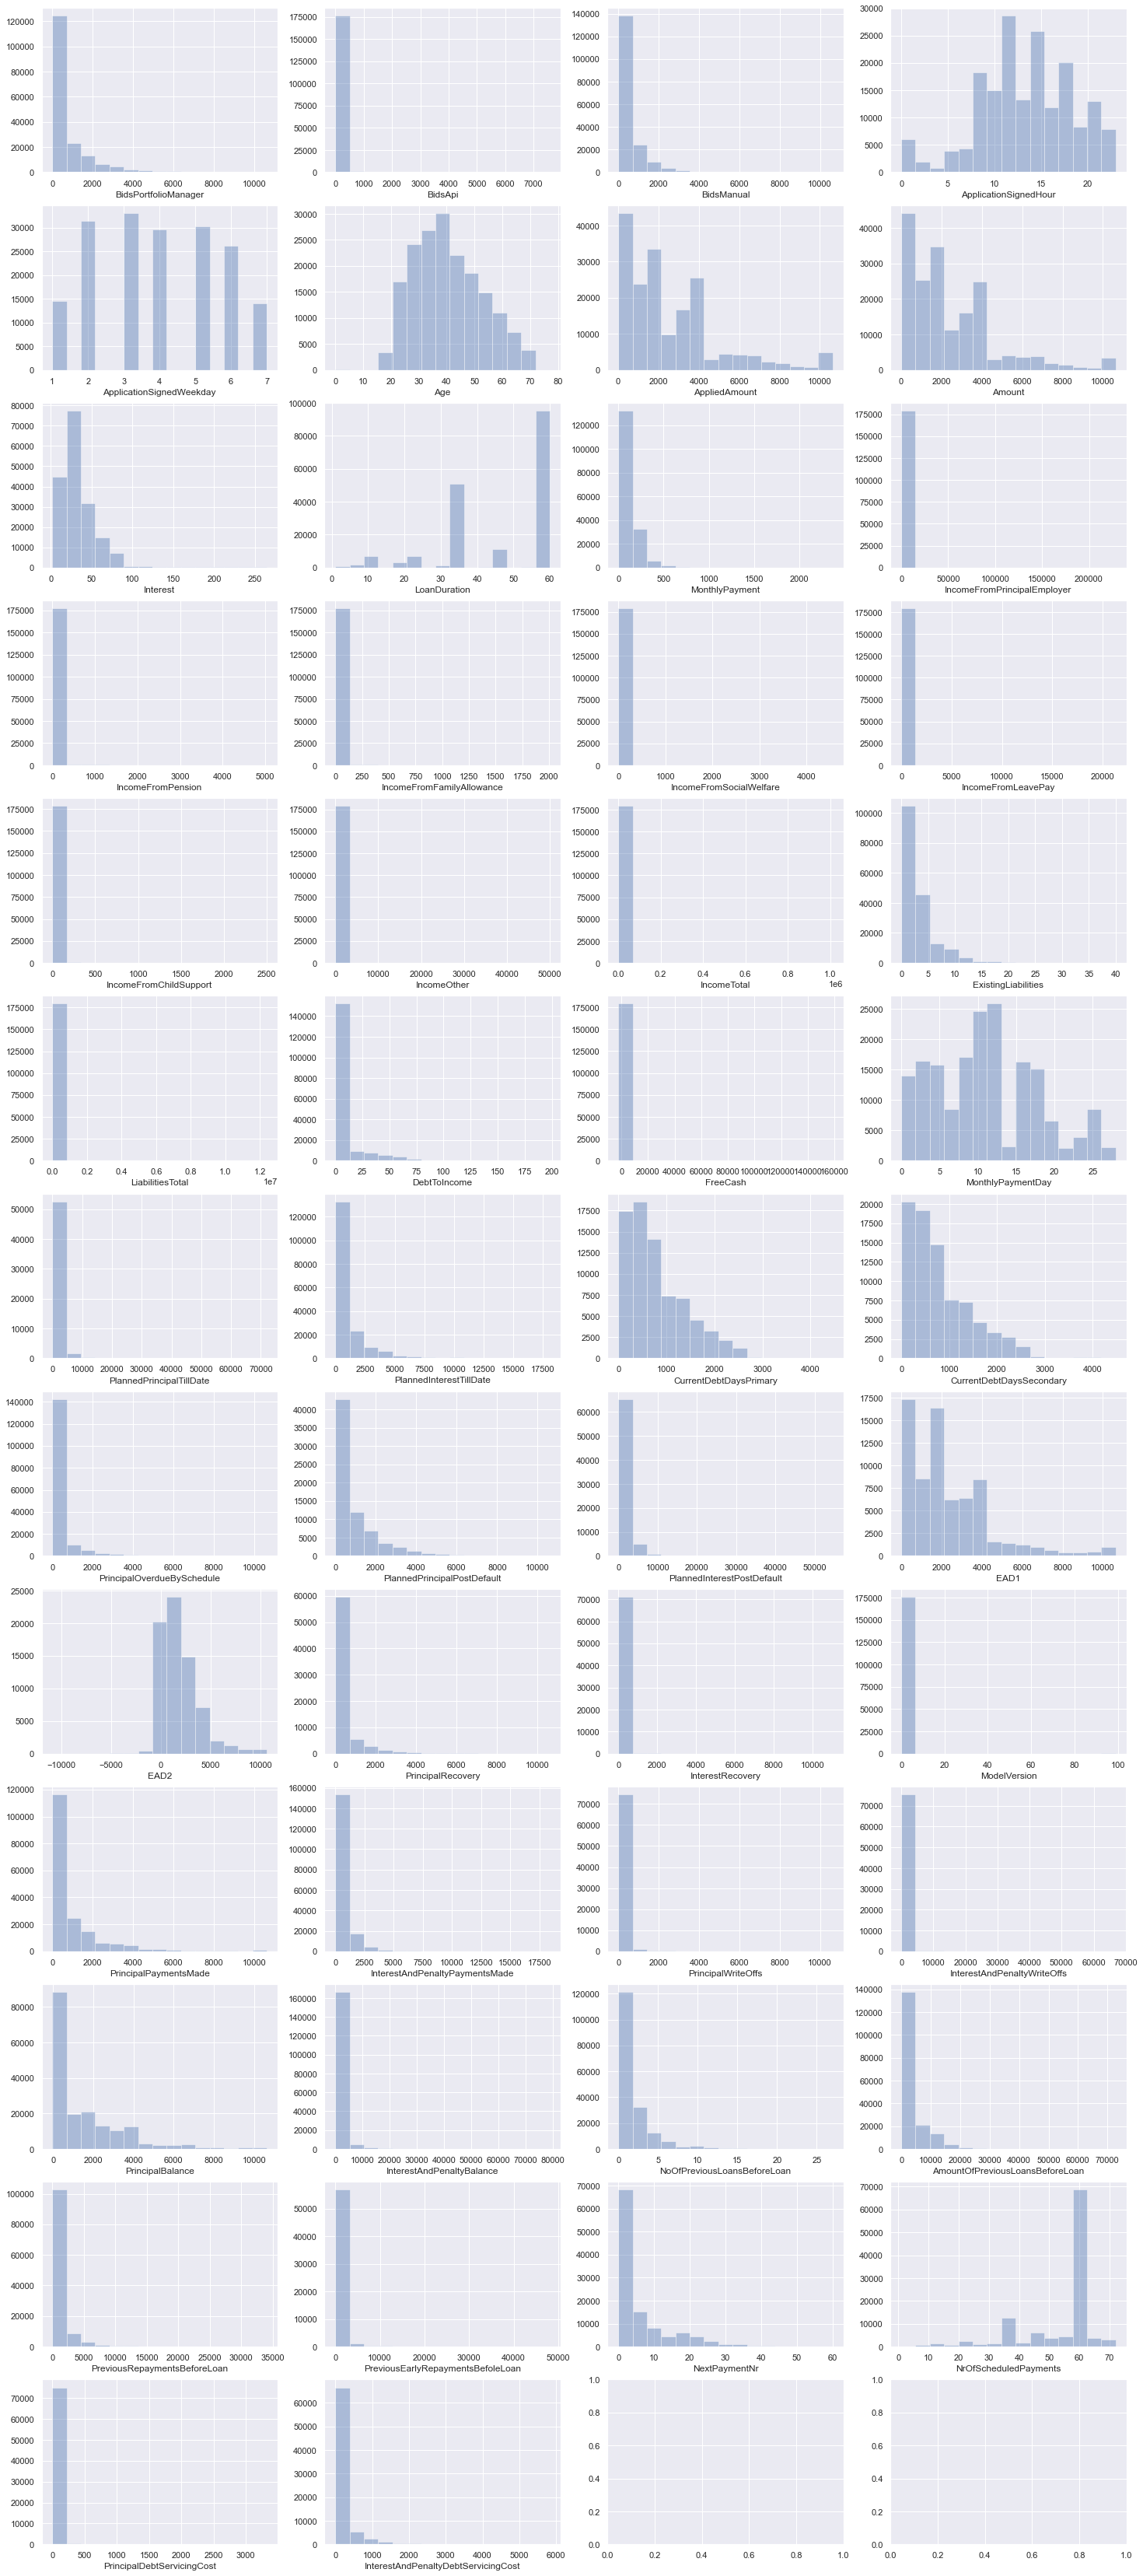

In [176]:
# Dealing with outliers
# plot a histogram for each of the features above 
import matplotlib.pyplot as plt

nrows = 13
ncols = 4

fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(25, 60))

r = 0
c = 0

for i in raw_data_numerical:
  sns.distplot(raw_data_numerical[i], bins=15,kde=False, ax=ax[r][c])
  if c == ncols - 1:
    r += 1
    c = 0
  else:
    c += 1

plt.show()

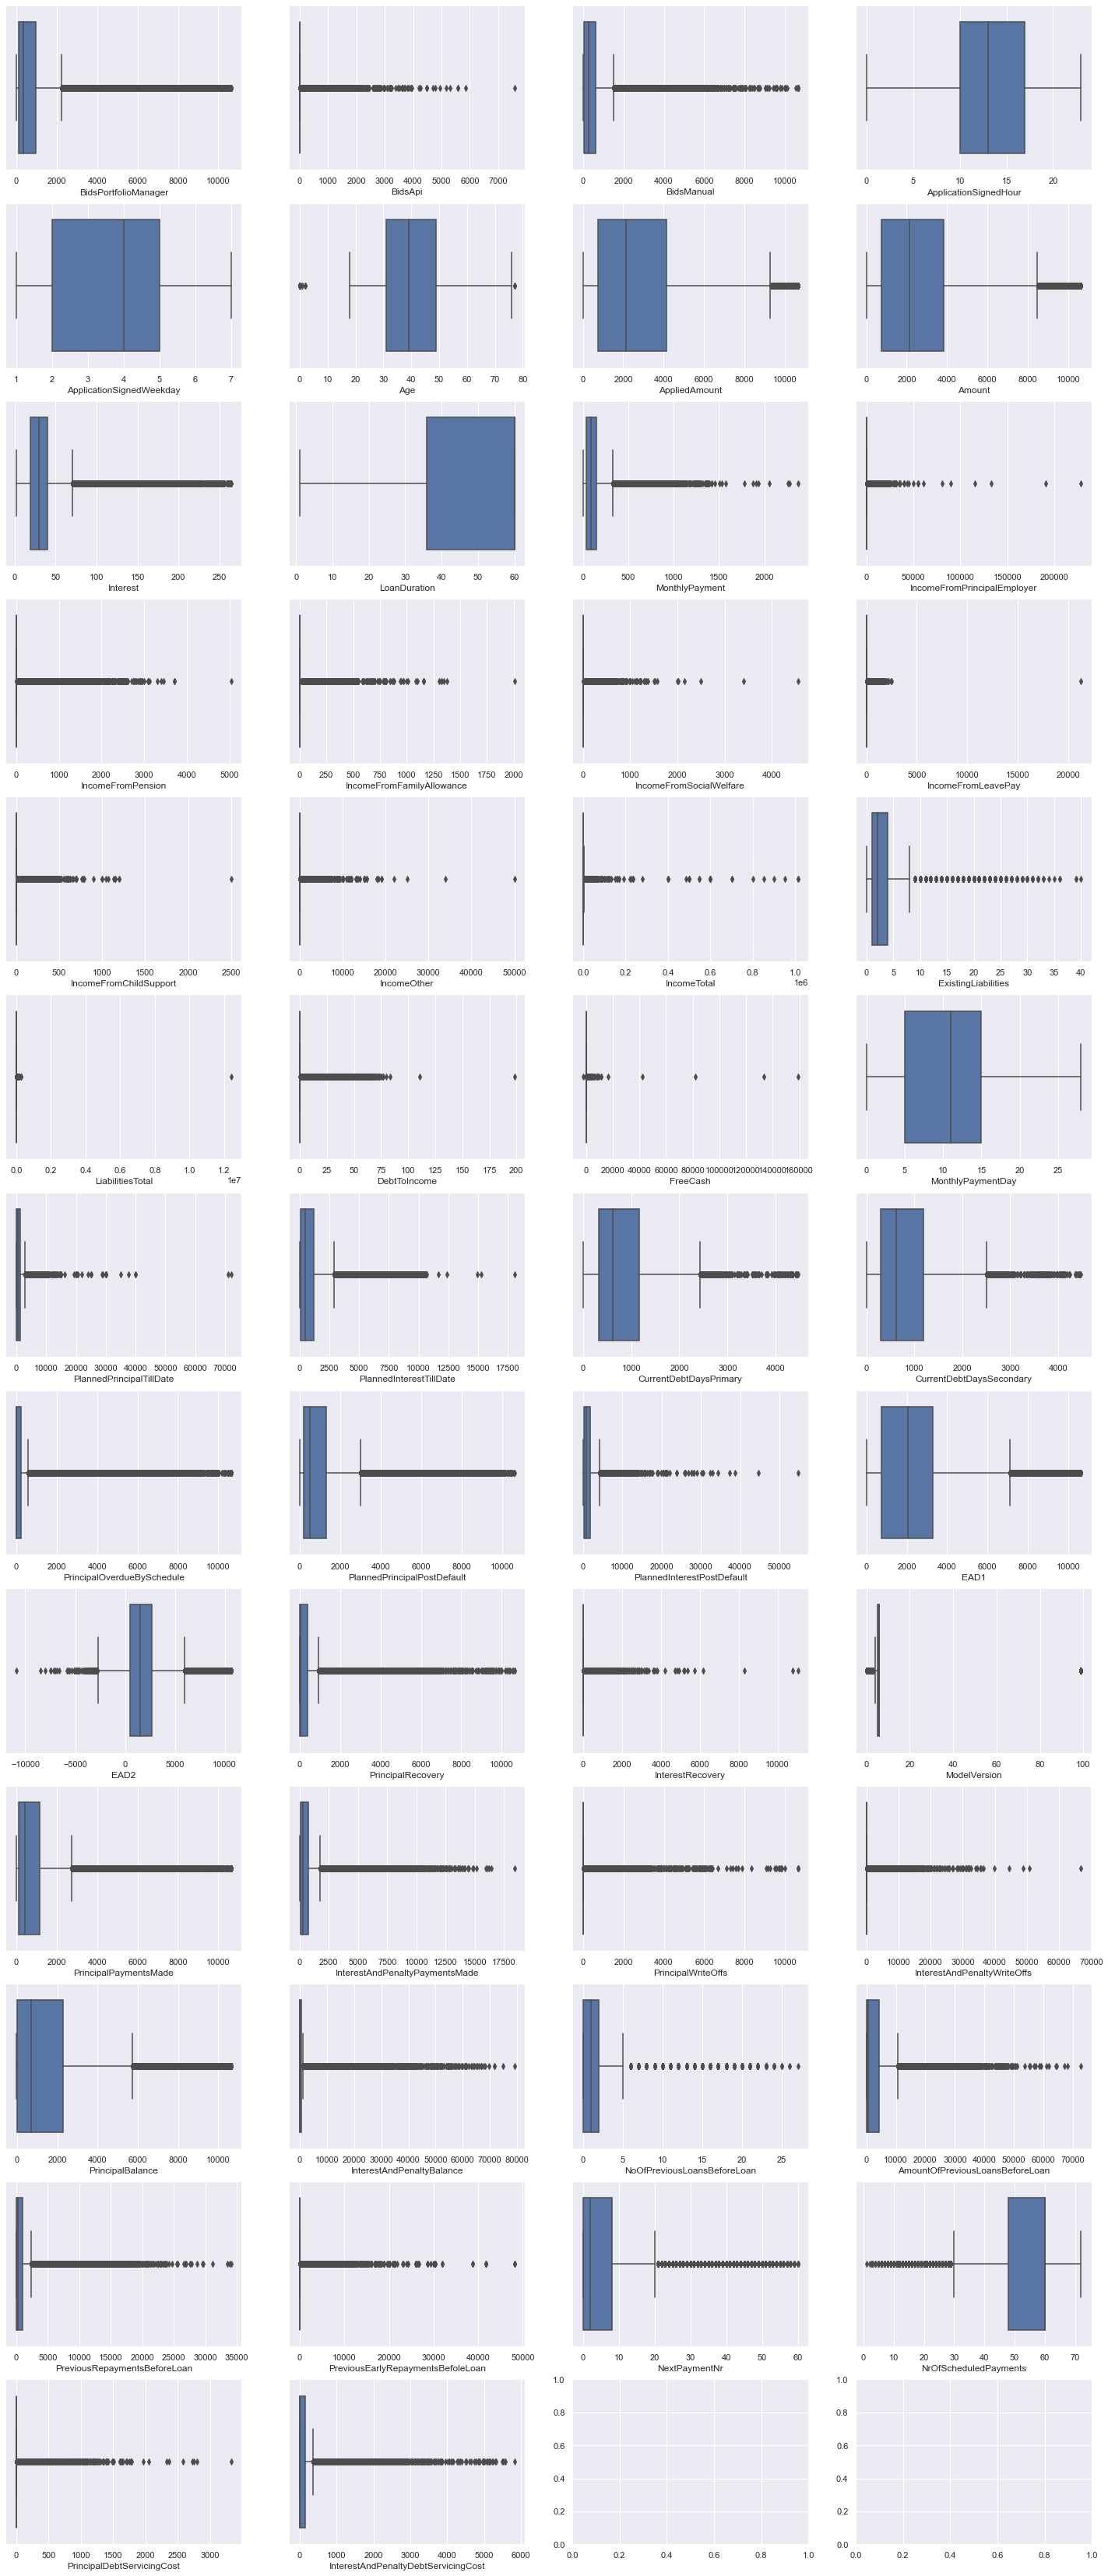

In [177]:
# Dealing with outliers
# plot a histogram for each of the features above 

nrows = 13
ncols = 4

fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(25, 60))

r = 0
c = 0

for i in raw_data_numerical:
  sns.boxplot(x= raw_data_numerical[i], ax=ax[r][c])
  if c == ncols - 1:
    r += 1
    c = 0
  else:
    c += 1

plt.show()

In [178]:
raw_data_numerical.shape

(179235, 50)

In [179]:
# Removing the outliers
# Extracting outliers indexes

def outliers(df, ft):
    Q1 = df[ft].quantile(0.25)
    Q3 = df[ft].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    ls = df.index [(df[ft] < lower_bound) | (df[ft] > upper_bound)]
    return ls

In [180]:
outliers(raw_data_numerical, 'Age')

Int64Index([1570, 1961, 1975, 1991, 1998, 2006, 2013, 2018, 2023, 2036, 2039,
            2043, 2054, 2059, 2065, 2069, 2088, 2114, 2121, 2128, 2143, 2151,
            2169, 2183, 2219, 2243, 2260, 2261, 2281, 2292, 2421, 2427, 2495,
            2625, 2798, 3028, 3030, 3068, 3073, 3194, 3218, 3223, 3230, 3288,
            3291, 3299, 3324, 3334, 3342, 3358, 3362, 3374, 3378, 3392, 3404,
            3436],
           dtype='int64')

In [181]:
index_list = []

for feature in raw_data_numerical.columns:
    index_list.extend(outliers(raw_data_numerical, feature))    

In [182]:
len(index_list)

508682

In [183]:
a_set = set(index_list)

#Convert to set

contains_duplicates = len(index_list) != len(a_set)

#Compare lengths


print(contains_duplicates)

True


In [184]:
len(a_set)

133490

In [185]:
print((raw_data_numerical.isnull().sum() * 100 / raw_data_numerical.shape[0]).sort_values(ascending=False))

PlannedPrincipalTillDate               69.613078
PreviousEarlyRepaymentsBefoleLoan      67.146484
EAD1                                   60.156219
EAD2                                   60.156219
InterestRecovery                       60.155662
PlannedPrincipalPostDefault            60.155662
PlannedInterestPostDefault             60.155662
PrincipalRecovery                      60.155662
InterestAndPenaltyDebtServicingCost    57.513878
PrincipalDebtServicingCost             57.513878
InterestAndPenaltyWriteOffs            57.513878
PrincipalWriteOffs                     57.513878
CurrentDebtDaysPrimary                 57.472592
CurrentDebtDaysSecondary               54.100483
NextPaymentNr                          37.349848
NrOfScheduledPayments                  37.349848
PreviousRepaymentsBeforeLoan           34.806818
PrincipalOverdueBySchedule              8.281307
MonthlyPayment                          3.732530
InterestAndPenaltyBalance               2.919073
ModelVersion        

In [186]:
raw_data_numerical.head(20)

BidsPortfolioManager  BidsApi  BidsManual  ApplicationSignedHour  \
0                    970     1150         5.0                     17   
1                   1295        0      1705.0                     11   
2                   2700      565      5835.0                     22   
3                   1115        0       385.0                     15   
4                    305        0       785.0                     20   
5                    600        0       175.0                      0   
6                    635        0         0.0                     15   
7                    295        0       705.0                     16   
8                   4000        0         0.0                     10   
9                   3790        0      1210.0                     12   
10                  1715        0       285.0                     17   
11                   530        0         0.0                     14   
12                  3295        0      2205.0                     22   
13                  5080        0      1820.0                     15   
14                  1375      175      1105.0                     10   
15                   120     3070         0.0                     14   
16                   455        0        75.0                     12   
17                     0        0       500.0                     15   
18                  3665        0        55.0                     11   
19                   760        0      1740.0                     10   

    ApplicationSignedWeekday  Age  AppliedAmount  Amount  Interest  \
0                          4   53         2125.0  2125.0     20.97   
1                          5   50         3000.0  3000.0     17.12   
2                          3   44        10630.0  9100.0     13.67   
3                          3   42         1500.0  1500.0     40.40   
4                          3   34         1595.0  1090.0     68.39   
5                          5   31         3720.0   775.0     73.73   
6                          2   22          635.0   635.0     42.66   
7                          4   47         1000.0  1000.0     61.49   
8                          2   60         4000.0  4000.0     31.01   
9                          4   39         5000.0  5000.0     24.52   
10                         3   31         2000.0  2000.0     17.11   
11                         2   45          530.0   530.0     25.68   
12                         4   49         5500.0  5500.0     21.62   
13                         3   31         6900.0  6900.0     21.63   
14                         3   35         2655.0  2655.0     26.88   
15                         4   22         3190.0  3190.0     51.55   
16                         7   42          530.0   530.0     50.82   
17                         2   33          500.0   500.0     43.97   
18                         5   67         3720.0  3720.0     26.94   
19                         2   23         2500.0  2500.0     32.58   

    LoanDuration  MonthlyPayment  IncomeFromPrincipalEmployer  \
0             60           62.05                          0.0   
1             60           84.75                        900.0   
2             60          268.57                        600.0   
3             60           63.53                        863.0   
4             48          101.19                          0.0   
5             60          243.19                        970.0   
6             60           27.12                        745.0   
7             12          116.95                          0.0   
8             36          185.35                       2590.0   
9             60          162.01                       1000.0   
10            60           56.49                        605.0   
11            60           16.92                        633.0   
12            60          162.64                        550.0   
13            60          212.13                        833.0   
14            60           86.63             

In [187]:
#Dropping the variance rejected numerical variables from the main data
raw_data.shape

raw_data.drop(['ExpectedLoss','ExpectedReturn','LossGivenDefault',
                         'PreviousEarlyRepaymentsCountBeforeLoan',
                         'ProbabilityOfDefault','RefinanceLiabilities'], axis = 1, inplace=True)
raw_data.shape

(179235, 87)

<AxesSubplot:>

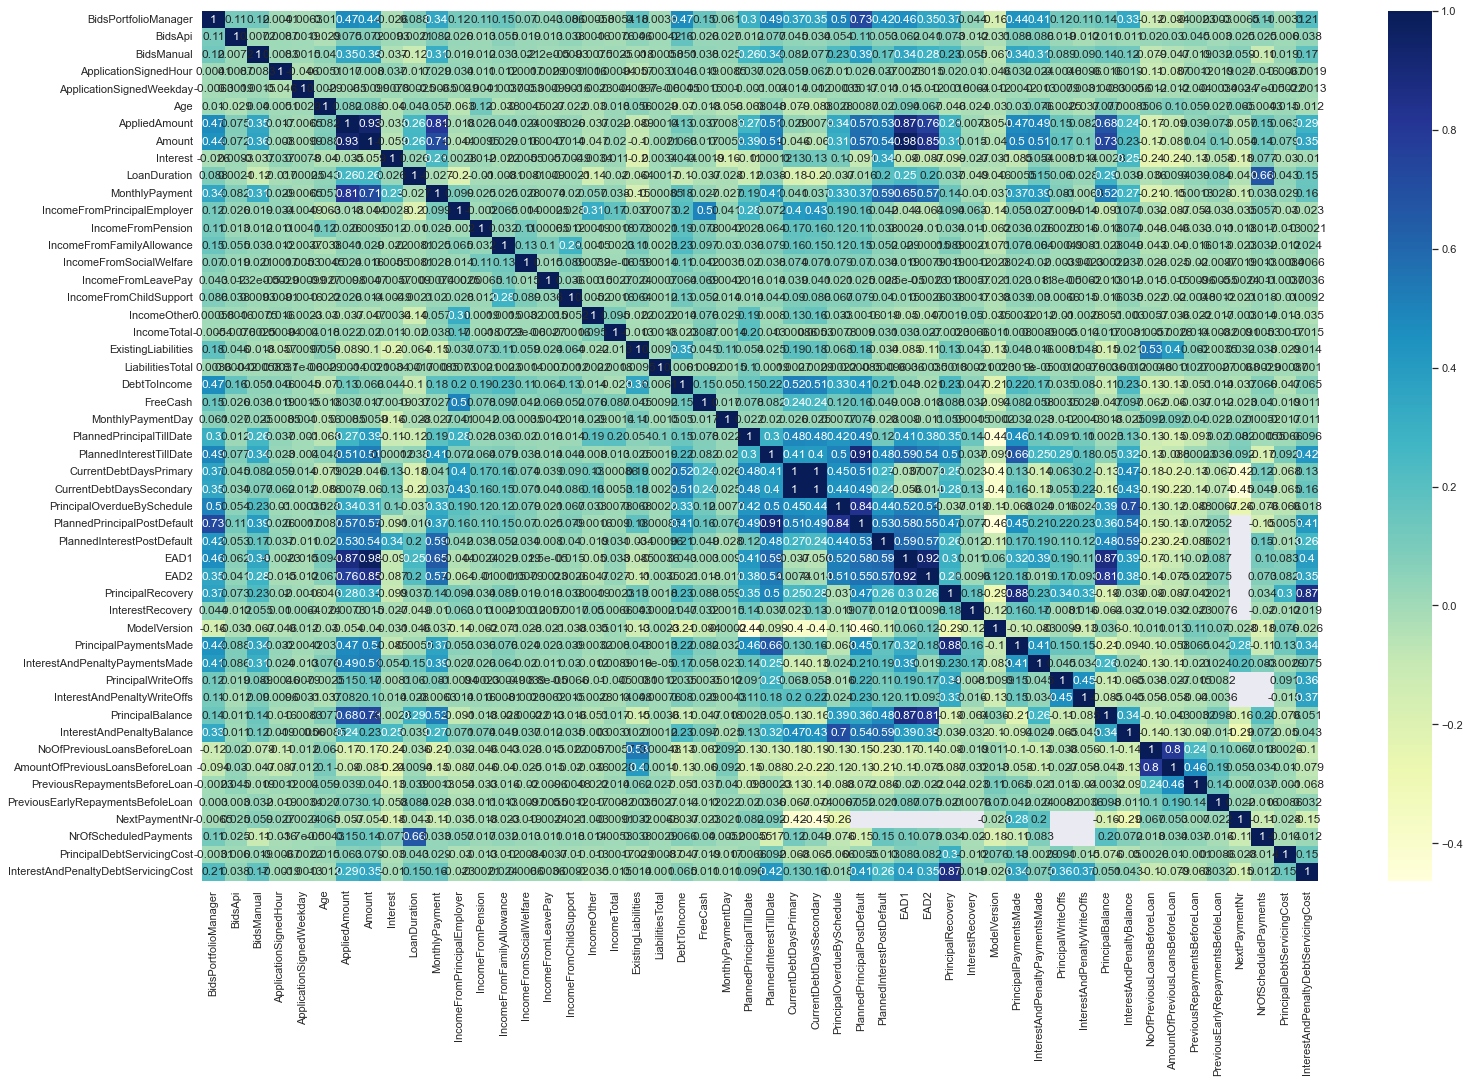

In [188]:
sns.set(rc = {'figure.figsize':(25,16)})
sns.heatmap(raw_data_numerical.corr(),annot=True,cmap='YlGnBu')

In [189]:
#Degree of correlation among numerical variables
cor_matrix = raw_data_numerical.corr().abs()
corr_df = pd.DataFrame(data = cor_matrix)
corr_df

BidsPortfolioManager   BidsApi  \
BidsPortfolioManager                             1.000000  0.105481   
BidsApi                                          0.105481  1.000000   
BidsManual                                       0.124697  0.007203   
ApplicationSignedHour                            0.004079  0.008698   
ApplicationSignedWeekday                         0.006252  0.001902   
Age                                              0.010431  0.029159   
AppliedAmount                                    0.471489  0.075047   
Amount                                           0.441288  0.072275   
Interest                                         0.025860  0.009324   
LoanDuration                                     0.087961  0.002056   
MonthlyPayment                                   0.344820  0.082035   
IncomeFromPrincipalEmployer                      0.116743  0.026270   
IncomeFromPension                                0.114736  0.012623   
IncomeFromFamilyAllowance                        0.152082  0.054906   
IncomeFromSocialWelfare                          0.069591  0.019211   
IncomeFromLeavePay                               0.042584  0.012576   
IncomeFromChildSupport                           0.085588  0.038364   
IncomeOther                                      0.000575  0.001642   
IncomeTotal                                      0.005448  0.007639   
ExistingLiabilities                              0.178562  0.045670   
LiabilitiesTotal                                 0.003576  0.000415   
DebtToIncome                                     0.465117  0.164100   
FreeCash                                         0.154522  0.026050   
MonthlyPaymentDay                                0.060646  0.027260   
PlannedPrincipalTillDate                         0.301546  0.011505   
PlannedInterestTillDate                          0.492308  0.077375   
CurrentDebtDaysPrimary                           0.369562  0.045337   
CurrentDebtDaysSecondary                         0.348913  0.034134   
PrincipalOverdueBySchedule                       0.497187  0.053904   
PlannedPrincipalPostDefault                      0.727886  0.113567   
PlannedInterestPostDefault                       0.421931  0.053268   
EAD1                                             0.462277  0.062260   
EAD2                                             0.349287  0.040943   
PrincipalRecovery                                0.368858  0.072526   
InterestRecovery                                 0.043658  0.012248   
ModelVersion                                     0.163206  0.031290   
PrincipalPaymentsMade                            0.442015  0.088083   
InterestAndPenaltyPaymentsMade                   0.407502  0.085981   
PrincipalWriteOffs                               0.124559  0.019059   
InterestAndPenaltyWriteOffs                      0.113894  0.012485   
PrincipalBalance                                 0.143038  0.011414   
InterestAndPenaltyBalance                        0.334391  0.011066   
NoOfPreviousLoansBeforeLoan                      0.122049  0.020341   
AmountOfPreviousLoansBeforeLoan                  0.093588  0.029531   
PreviousRepaymentsBeforeLoan                     0.002308  0.044975   
PreviousEarlyRepaymentsBefoleLoan                0.002982  0.002999   
NextPaymentNr                                    0.006524  0.024978   
NrOfScheduledPayments                            0.108554  0.024661   
PrincipalDebtServicingCost                       0.003065  0.005999   
InterestAndPenaltyDebtServicingCost              0.212691  0.037745   

                                     BidsManual  ApplicationSignedHour  \
BidsPortfolioManager                   0.124697               0.004079   
BidsApi                                0.007203               0.008698   
BidsManual                             1.000000               0.008326   
ApplicationSignedHour                  0.008326               1.000000   
ApplicationSignedWeekday               0.0014

In [190]:
# Single Upper triangle of heat map is mirror image of lower triangle
# We can select upper triangle
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(bool))
print(upper_tri)

                                     BidsPortfolioManager   BidsApi  \
BidsPortfolioManager                                  NaN  0.105481   
BidsApi                                               NaN       NaN   
BidsManual                                            NaN       NaN   
ApplicationSignedHour                                 NaN       NaN   
ApplicationSignedWeekday                              NaN       NaN   
Age                                                   NaN       NaN   
AppliedAmount                                         NaN       NaN   
Amount                                                NaN       NaN   
Interest                                              NaN       NaN   
LoanDuration                                          NaN       NaN   
MonthlyPayment                                        NaN       NaN   
IncomeFromPrincipalEmployer                           NaN       NaN   
IncomeFromPension                                     NaN       NaN   
Income

In [191]:
# Dropping numerical columns with high correlation
# Making a list of columns to drop
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.95)]
print(); print(to_drop)


['CurrentDebtDaysSecondary', 'EAD1']


Dropping one of these columns (CurrentDebtDaysSecondary, EAD1) from the main data. EAD1 will be dropped because it contains more missing data

In [192]:
raw_data.drop(['EAD1'], axis = 1, inplace=True)

In [193]:
raw_data.shape

(179235, 86)

#### Dealing with missing values
*   Missing values of numeric avariables will be replace with their median
*   Categorical variables will be filled with the most recurrent value.

In [194]:
from sklearn.impute import SimpleImputer

raw_data_num = raw_data.select_dtypes(exclude='object').columns
raw_data_cat = raw_data.select_dtypes(include='object').columns

# fill missing values for numerical variables
imputer = SimpleImputer(missing_values=np.nan, strategy='median')
imputer = imputer.fit(raw_data.loc[:, raw_data_num ])
raw_data.loc[:, raw_data_num ] = imputer.transform(raw_data.loc[:, raw_data_num ])

# fill missing values for categorical variables
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imputer = imputer.fit(raw_data.loc[:, raw_data_cat])
raw_data.loc[:, raw_data_cat] = imputer.transform(raw_data.loc[:, raw_data_cat])

In [195]:
raw_data.isnull().sum()

ListedOnUTC                            0
BiddingStartedOn                       0
BidsPortfolioManager                   0
BidsApi                                0
BidsManual                             0
NewCreditCustomer                      0
LoanApplicationStartedDate             0
LoanDate                               0
ContractEndDate                        0
FirstPaymentDate                       0
MaturityDate_Original                  0
MaturityDate_Last                      0
ApplicationSignedHour                  0
ApplicationSignedWeekday               0
VerificationType                       0
LanguageCode                           0
Age                                    0
Gender                                 0
Country                                0
AppliedAmount                          0
Amount                                 0
Interest                               0
LoanDuration                           0
MonthlyPayment                         0
UseOfLoan       

All missing data has been taken care of now. Data can now be standardized and used for modeling

# Exploratory Data Analysis

C:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Amount of Loan issued to borrowers')

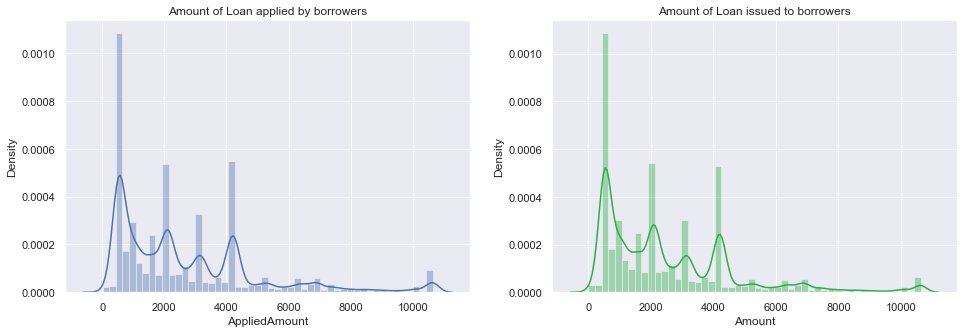

In [196]:
# Analysing the amount of loan originally applied by borrowers
# Amount of loan given to borrowers upon request

fig, ax = plt.subplots(1, 2, figsize=(16,5))

sns.distplot(raw_data['AppliedAmount'],ax=ax[0])
ax[0].set_title('Amount of Loan applied by borrowers')

sns.distplot(raw_data['Amount'],ax=ax[1], color="#2EAD46")
ax[1].set_title('Amount of Loan issued to borrowers')

#### **Summary:**
*    Most of the Loans applied for were in the range of 0 and 4000
*    Most of the Loans issued to borrowers were also in the range between 0 and 4000
*    It is clear from both graphs that borrowers were issued the amounts they applied for

In [197]:
# Years in which loan was issued
# Transforming the LoanDate Variable 
raw_data ['LoanDate'].head()
dt_series = pd.to_datetime(raw_data['LoanDate'],infer_datetime_format=True)
raw_data['loan_year'] = dt_series.dt.year

C:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Average loan amount issued')

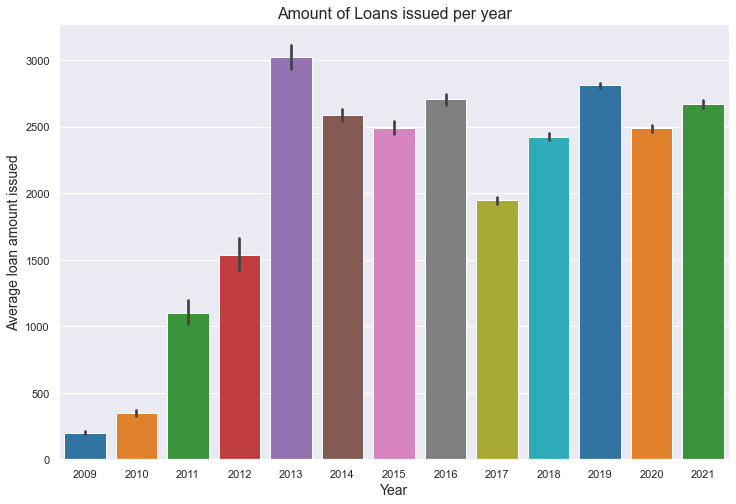

In [198]:
plt.figure(figsize=(12,8))
sns.barplot('loan_year', 'Amount', data= raw_data, palette='tab10')
plt.title('Amount of Loans issued per year', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average loan amount issued', fontsize=14)

#### Summary:
        - The company started issuing loans in 2009
        - Highest amount of loans were issued in 2013 followed by 2019 and 2016
        - The least amount of loans issued was in 2009, perhaps this may be because the comapny was not known as much

In [199]:
raw_data['UseOfLoan'].unique()

array([  2,   3,   7,   8,   6,   0,   5,   4,   1, 101, 104, 102, 110,
       108, 106, 107,  -1], dtype=int64)

C:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'How borrowers use their loans')

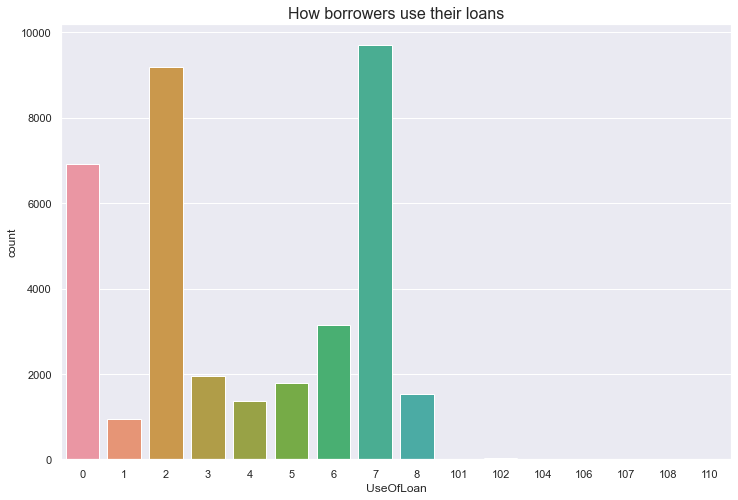

In [200]:
# Checking what borrowers use the loans for
loan_use = raw_data[raw_data['UseOfLoan'] != -1]

plt.figure(figsize=(12,8))
sns.countplot(loan_use['UseOfLoan'])
plt.title('How borrowers use their loans', fontsize=16)


#### Summary:
        - 0 Loan consolidation 1 Real estate 2 Home improvement 3 Business 4 Education 5 Travel 6 Vehicle 7 Other 8 Health 101 Working capital financing 102 Purchase of machinery equipment 103 Renovation of real estate 104 Accounts receivable financing 105 Acquisition of means of transport 106 Construction finance 107 Acquisition of stocks 108 Acquisition of real estate 109 Guaranteeing obligation 110 Other business All codes in format 1XX are for business loans that are not supported since October 2012
        - Most of the amount borrowed were use for loan consolidation, Home improvement and Other entities

In [201]:
raw_data['Country'].unique()

array(['EE', 'ES', 'FI', 'SK'], dtype=object)

<AxesSubplot:xlabel='Country', ylabel='Amount'>

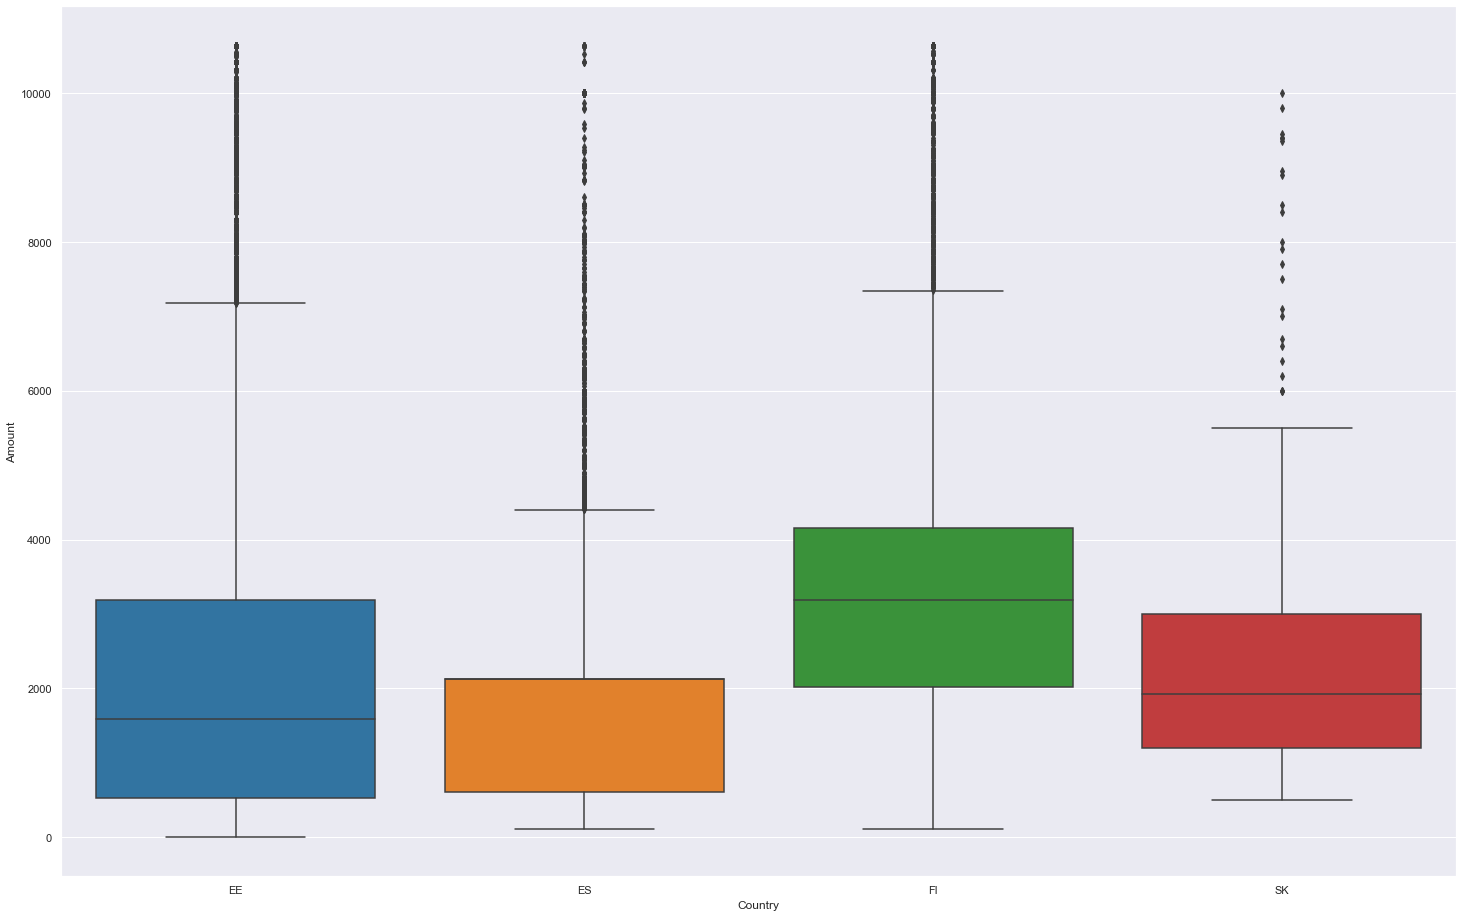

In [202]:
# Amount of loans issued per location
sns.boxplot(x='Country', y='Amount', data= raw_data, palette='tab10')

# Machine Learning modeling

#### Preprocessing of data
 Coverting categorical data to numeric using LabelEncoder(for binary categorical data) and get_dummies for other categorial variables

In [203]:
raw_data.head()

ListedOnUTC  BiddingStartedOn  BidsPortfolioManager  BidsApi  \
0  23/03/2016 16:07  23/03/2016 16:07                 970.0   1150.0   
1  25/06/2015 11:02  25/06/2015 11:02                1295.0      0.0   
2  14/01/2016 10:00  14/01/2016 10:00                2700.0    565.0   
3  24/03/2015 15:55  24/03/2015 15:55                1115.0      0.0   
4  17/12/2015 10:12  17/12/2015 10:12                 305.0      0.0   

   BidsManual  NewCreditCustomer LoanApplicationStartedDate    LoanDate  \
0         5.0                0.0           17/03/2016 12:39  23/03/2016   
1      1705.0                0.0           24/06/2015 12:36  25/06/2015   
2      5835.0                1.0           07/01/2016 15:37  19/01/2016   
3       385.0                1.0           20/03/2015 15:20  27/03/2015   
4       785.0                1.0           13/12/2015 00:30  22/12/2015   

  ContractEndDate FirstPaymentDate MaturityDate_Original MaturityDate_Last  \
0      26/06/2020       12/05/2016            12/04/2021        26/06/2020   
1      27/04/2026       17/08/2015            17/07/2020        17/07/2020   
2      24/10/2019       22/02/2016            20/01/2021        20/01/2021   
3      27/04/2026       04/05/2015            01/04/2020        01/04/2020   
4      27/04/2026       01/02/2016            02/01/2020        02/01/2020   

   ApplicationSignedHour  ApplicationSignedWeekday  VerificationType  \
0                   17.0                       4.0               4.0   
1                   11.0                       5.0               1.0   
2                   22.0                       3.0               4.0   
3                   15.0                       3.0               3.0   
4                   20.0                       3.0               4.0   

   LanguageCode   Age  Gender Country  AppliedAmount  Amount  Interest  \
0             1  53.0     1.0      EE         2125.0  2125.0     20.97   
1             1  50.0     1.0      EE         3000.0  3000.0     17.12   
2             1  44.0     0.0      EE        10630.0  9100.0     13.67   
3             6  42.0     0.0      ES         1500.0  1500.0     40.40   
4             6  34.0     1.0      ES         1595.0  1090.0     68.39   

   LoanDuration  MonthlyPayment  UseOfLoan  Education  MaritalStatus  \
0          60.0           62.05          2        4.0            2.0   
1          60.0           84.75          3        5.0            2.0   
2          60.0          268.57          3        4.0            4.0   
3          60.0           63.53          2        2.0            1.0   
4          48.0          101.19          7        4.0            4.0   

   EmploymentStatus EmploymentDurationCurrentEmployer  OccupationArea  \
0               6.0                    MoreThan5Years             1.0   
1               5.0                    MoreThan5Years             7.0   
2               5.0                        UpTo3Years             8.0   
3               3.0                        UpTo5Years             1.0   
4               6.0                         UpTo1Year             1.0   

   HomeOwnershipType  IncomeFromPrincipalEmployer  IncomeFromPension  \
0                1.0                          0.0              301.0   
1                1.0                        900.0                0.0   
2                8.0                        600.0                0.0   
3                2.0                        863.0                0.0   
4                3.0                          0.0              697.0   

   IncomeFromFamilyAllowance  IncomeFromSocialWelfare  IncomeFromLeavePay  \
0                        0.0                     53.0                 0.0   
1                        0.0                      0.0                 0.0   
2                        0.0                      0.0                 0.0   
3                        0.0                      0.0                 0.0   
4                        0.0                      0.0                 0.0   

   Income

In [204]:
# Rating is our target variable but this variable has different values which need to be recoded

raw_data['Rating'].unique()

array(['C', 'B', 'A', 'F', 'HR', 'E', 'D', 'AA'], dtype=object)

In [205]:
#Recoding the target variable to binary 
# ('AA','A','B','C') ==low risk ('D','E','F','HR') ==High risk

risk_rating = ['AA','A','B','C','D','E','F','HR']
lowRisk_highRisk = [0,0,0,0,1,1,1,1]

raw_data['Risk_target'] = raw_data['Rating'].replace(risk_rating,lowRisk_highRisk)

In [206]:
# Now we can drop the rating variable
raw_data.drop('Rating', axis=1, inplace=True)

In [207]:
#Separating the target variable from the rest of the variables so we can process the data

raw_data_no_label = raw_data.drop('Risk_target', axis =1)

label= raw_data.Risk_target

In [208]:
raw_data_no_label.head()


ListedOnUTC  BiddingStartedOn  BidsPortfolioManager  BidsApi  \
0  23/03/2016 16:07  23/03/2016 16:07                 970.0   1150.0   
1  25/06/2015 11:02  25/06/2015 11:02                1295.0      0.0   
2  14/01/2016 10:00  14/01/2016 10:00                2700.0    565.0   
3  24/03/2015 15:55  24/03/2015 15:55                1115.0      0.0   
4  17/12/2015 10:12  17/12/2015 10:12                 305.0      0.0   

   BidsManual  NewCreditCustomer LoanApplicationStartedDate    LoanDate  \
0         5.0                0.0           17/03/2016 12:39  23/03/2016   
1      1705.0                0.0           24/06/2015 12:36  25/06/2015   
2      5835.0                1.0           07/01/2016 15:37  19/01/2016   
3       385.0                1.0           20/03/2015 15:20  27/03/2015   
4       785.0                1.0           13/12/2015 00:30  22/12/2015   

  ContractEndDate FirstPaymentDate MaturityDate_Original MaturityDate_Last  \
0      26/06/2020       12/05/2016            12/04/2021        26/06/2020   
1      27/04/2026       17/08/2015            17/07/2020        17/07/2020   
2      24/10/2019       22/02/2016            20/01/2021        20/01/2021   
3      27/04/2026       04/05/2015            01/04/2020        01/04/2020   
4      27/04/2026       01/02/2016            02/01/2020        02/01/2020   

   ApplicationSignedHour  ApplicationSignedWeekday  VerificationType  \
0                   17.0                       4.0               4.0   
1                   11.0                       5.0               1.0   
2                   22.0                       3.0               4.0   
3                   15.0                       3.0               3.0   
4                   20.0                       3.0               4.0   

   LanguageCode   Age  Gender Country  AppliedAmount  Amount  Interest  \
0             1  53.0     1.0      EE         2125.0  2125.0     20.97   
1             1  50.0     1.0      EE         3000.0  3000.0     17.12   
2             1  44.0     0.0      EE        10630.0  9100.0     13.67   
3             6  42.0     0.0      ES         1500.0  1500.0     40.40   
4             6  34.0     1.0      ES         1595.0  1090.0     68.39   

   LoanDuration  MonthlyPayment  UseOfLoan  Education  MaritalStatus  \
0          60.0           62.05          2        4.0            2.0   
1          60.0           84.75          3        5.0            2.0   
2          60.0          268.57          3        4.0            4.0   
3          60.0           63.53          2        2.0            1.0   
4          48.0          101.19          7        4.0            4.0   

   EmploymentStatus EmploymentDurationCurrentEmployer  OccupationArea  \
0               6.0                    MoreThan5Years             1.0   
1               5.0                    MoreThan5Years             7.0   
2               5.0                        UpTo3Years             8.0   
3               3.0                        UpTo5Years             1.0   
4               6.0                         UpTo1Year             1.0   

   HomeOwnershipType  IncomeFromPrincipalEmployer  IncomeFromPension  \
0                1.0                          0.0              301.0   
1                1.0                        900.0                0.0   
2                8.0                        600.0                0.0   
3                2.0                        863.0                0.0   
4                3.0                          0.0              697.0   

   IncomeFromFamilyAllowance  IncomeFromSocialWelfare  IncomeFromLeavePay  \
0                        0.0                     53.0                 0.0   
1                        0.0                      0.0                 0.0   
2                        0.0                      0.0                 0.0   
3                        0.0                      0.0                 0.0   
4                        0.0                      0.0                 0.0   

   Income

In [209]:
#Getting list of 'object' variables away from the numerical variables

from sklearn import preprocessing

bin_var = raw_data_no_label.nunique()[raw_data_no_label.nunique() == 2].keys().tolist()
num_var = [col for col in raw_data_no_label.select_dtypes(['int', 'float']).columns.tolist() if col not in bin_var]
cat_var = [col for col in raw_data_no_label.select_dtypes(['object']).columns.tolist() if col not in bin_var]

In [210]:
print(bin_var)

['NewCreditCustomer', 'ActiveScheduleFirstPaymentReached', 'RecoveryStage', 'Restructured']


In [211]:
print(num_var)

['BidsPortfolioManager', 'BidsApi', 'BidsManual', 'ApplicationSignedHour', 'ApplicationSignedWeekday', 'VerificationType', 'LanguageCode', 'Age', 'Gender', 'AppliedAmount', 'Amount', 'Interest', 'LoanDuration', 'MonthlyPayment', 'UseOfLoan', 'Education', 'MaritalStatus', 'EmploymentStatus', 'OccupationArea', 'HomeOwnershipType', 'IncomeFromPrincipalEmployer', 'IncomeFromPension', 'IncomeFromFamilyAllowance', 'IncomeFromSocialWelfare', 'IncomeFromLeavePay', 'IncomeFromChildSupport', 'IncomeOther', 'IncomeTotal', 'ExistingLiabilities', 'LiabilitiesTotal', 'DebtToIncome', 'FreeCash', 'MonthlyPaymentDay', 'PlannedPrincipalTillDate', 'PlannedInterestTillDate', 'CurrentDebtDaysPrimary', 'CurrentDebtDaysSecondary', 'PrincipalOverdueBySchedule', 'PlannedPrincipalPostDefault', 'PlannedInterestPostDefault', 'EAD2', 'PrincipalRecovery', 'InterestRecovery', 'ModelVersion', 'CreditScoreEeMini', 'PrincipalPaymentsMade', 'InterestAndPenaltyPaymentsMade', 'PrincipalWriteOffs', 'InterestAndPenaltyWrite

In [212]:
sorted(cat_var)

['ActiveLateCategory',
 'ActiveLateLastPaymentCategory',
 'BiddingStartedOn',
 'ContractEndDate',
 'Country',
 'CreditScoreEsMicroL',
 'DebtOccuredOn',
 'DebtOccuredOnForSecondary',
 'DefaultDate',
 'EmploymentDurationCurrentEmployer',
 'FirstPaymentDate',
 'LastPaymentOn',
 'ListedOnUTC',
 'LoanApplicationStartedDate',
 'LoanDate',
 'MaturityDate_Last',
 'MaturityDate_Original',
 'NextPaymentDate',
 'ReScheduledOn',
 'StageActiveSince',
 'Status',
 'WorseLateCategory']

In [213]:
# Making a copy of the data
raw_data_no_label_encoded = raw_data_no_label.copy()

In [214]:
raw_data_no_label_encoded.head()

ListedOnUTC  BiddingStartedOn  BidsPortfolioManager  BidsApi  \
0  23/03/2016 16:07  23/03/2016 16:07                 970.0   1150.0   
1  25/06/2015 11:02  25/06/2015 11:02                1295.0      0.0   
2  14/01/2016 10:00  14/01/2016 10:00                2700.0    565.0   
3  24/03/2015 15:55  24/03/2015 15:55                1115.0      0.0   
4  17/12/2015 10:12  17/12/2015 10:12                 305.0      0.0   

   BidsManual  NewCreditCustomer LoanApplicationStartedDate    LoanDate  \
0         5.0                0.0           17/03/2016 12:39  23/03/2016   
1      1705.0                0.0           24/06/2015 12:36  25/06/2015   
2      5835.0                1.0           07/01/2016 15:37  19/01/2016   
3       385.0                1.0           20/03/2015 15:20  27/03/2015   
4       785.0                1.0           13/12/2015 00:30  22/12/2015   

  ContractEndDate FirstPaymentDate MaturityDate_Original MaturityDate_Last  \
0      26/06/2020       12/05/2016            12/04/2021        26/06/2020   
1      27/04/2026       17/08/2015            17/07/2020        17/07/2020   
2      24/10/2019       22/02/2016            20/01/2021        20/01/2021   
3      27/04/2026       04/05/2015            01/04/2020        01/04/2020   
4      27/04/2026       01/02/2016            02/01/2020        02/01/2020   

   ApplicationSignedHour  ApplicationSignedWeekday  VerificationType  \
0                   17.0                       4.0               4.0   
1                   11.0                       5.0               1.0   
2                   22.0                       3.0               4.0   
3                   15.0                       3.0               3.0   
4                   20.0                       3.0               4.0   

   LanguageCode   Age  Gender Country  AppliedAmount  Amount  Interest  \
0             1  53.0     1.0      EE         2125.0  2125.0     20.97   
1             1  50.0     1.0      EE         3000.0  3000.0     17.12   
2             1  44.0     0.0      EE        10630.0  9100.0     13.67   
3             6  42.0     0.0      ES         1500.0  1500.0     40.40   
4             6  34.0     1.0      ES         1595.0  1090.0     68.39   

   LoanDuration  MonthlyPayment  UseOfLoan  Education  MaritalStatus  \
0          60.0           62.05          2        4.0            2.0   
1          60.0           84.75          3        5.0            2.0   
2          60.0          268.57          3        4.0            4.0   
3          60.0           63.53          2        2.0            1.0   
4          48.0          101.19          7        4.0            4.0   

   EmploymentStatus EmploymentDurationCurrentEmployer  OccupationArea  \
0               6.0                    MoreThan5Years             1.0   
1               5.0                    MoreThan5Years             7.0   
2               5.0                        UpTo3Years             8.0   
3               3.0                        UpTo5Years             1.0   
4               6.0                         UpTo1Year             1.0   

   HomeOwnershipType  IncomeFromPrincipalEmployer  IncomeFromPension  \
0                1.0                          0.0              301.0   
1                1.0                        900.0                0.0   
2                8.0                        600.0                0.0   
3                2.0                        863.0                0.0   
4                3.0                          0.0              697.0   

   IncomeFromFamilyAllowance  IncomeFromSocialWelfare  IncomeFromLeavePay  \
0                        0.0                     53.0                 0.0   
1                        0.0                      0.0                 0.0   
2                        0.0                      0.0                 0.0   
3                        0.0                      0.0                 0.0   
4                        0.0                      0.0                 0.0   

   Income

In [215]:
# View only the values of the supposed categorical variables
# Can be notices majority of them are datetime variables which need to be converted

raw_data_no_label_encoded[cat_var].head()

ListedOnUTC  BiddingStartedOn LoanApplicationStartedDate    LoanDate  \
0  23/03/2016 16:07  23/03/2016 16:07           17/03/2016 12:39  23/03/2016   
1  25/06/2015 11:02  25/06/2015 11:02           24/06/2015 12:36  25/06/2015   
2  14/01/2016 10:00  14/01/2016 10:00           07/01/2016 15:37  19/01/2016   
3  24/03/2015 15:55  24/03/2015 15:55           20/03/2015 15:20  27/03/2015   
4  17/12/2015 10:12  17/12/2015 10:12           13/12/2015 00:30  22/12/2015   

  ContractEndDate FirstPaymentDate MaturityDate_Original MaturityDate_Last  \
0      26/06/2020       12/05/2016            12/04/2021        26/06/2020   
1      27/04/2026       17/08/2015            17/07/2020        17/07/2020   
2      24/10/2019       22/02/2016            20/01/2021        20/01/2021   
3      27/04/2026       04/05/2015            01/04/2020        01/04/2020   
4      27/04/2026       01/02/2016            02/01/2020        02/01/2020   

  Country EmploymentDurationCurrentEmployer LastPaymentOn DebtOccuredOn  \
0      EE                    MoreThan5Years    16/06/2021    14/01/2020   
1      EE                    MoreThan5Years    19/06/2019    18/04/2016   
2      EE                        UpTo3Years    23/10/2019    20/10/2017   
3      ES                        UpTo5Years    07/08/2020    01/12/2015   
4      ES                         UpTo1Year    01/02/2016    01/02/2016   

  DebtOccuredOnForSecondary DefaultDate  StageActiveSince  Status  \
0                28/10/2019  14/01/2020           27:48.5    Late   
1                17/02/2016  02/06/2016  01/08/2019 14:18    Late   
2                21/08/2017  06/12/2017           43:37.7  Repaid   
3                01/12/2015  19/02/2016  27/11/2020 00:00    Late   
4                01/02/2016  18/04/2016  27/11/2020 00:00    Late   

  ActiveLateCategory WorseLateCategory CreditScoreEsMicroL NextPaymentDate  \
0               180+              180+                   M      13/08/2021   
1               180+              180+                   M      13/08/2021   
2               180+              180+                   M      13/08/2021   
3               180+              180+                  M3      13/08/2021   
4               180+              180+                  M5      13/08/2021   

  ReScheduledOn ActiveLateLastPaymentCategory  
0    07/04/2020                         31-60  
1    07/04/2020                          180+  
2    07/04/2020                          180+  
3    07/04/2020                          180+  
4    07/04/2020                          180+

In [216]:
# Converting some variables in cat_var to datetime variable

raw_data_no_label_encoded['BiddingStartedOn']=pd.to_datetime(raw_data_no_label_encoded['BiddingStartedOn'], infer_datetime_format=True)
raw_data_no_label_encoded['ContractEndDate']=pd.to_datetime(raw_data_no_label_encoded['ContractEndDate'], infer_datetime_format=True)
raw_data_no_label_encoded['DebtOccuredOn']=pd.to_datetime(raw_data_no_label_encoded['DebtOccuredOn'], infer_datetime_format=True)
raw_data_no_label_encoded['DebtOccuredOnForSecondary']=pd.to_datetime(raw_data_no_label_encoded['DebtOccuredOnForSecondary'], infer_datetime_format=True)
raw_data_no_label_encoded['DefaultDate']=pd.to_datetime(raw_data_no_label_encoded['DefaultDate'], infer_datetime_format=True)
raw_data_no_label_encoded['FirstPaymentDate']=pd.to_datetime(raw_data_no_label_encoded['FirstPaymentDate'], infer_datetime_format=True)
raw_data_no_label_encoded['LastPaymentOn']=pd.to_datetime(raw_data_no_label_encoded['LastPaymentOn'], infer_datetime_format=True)
raw_data_no_label_encoded['ListedOnUTC']=pd.to_datetime(raw_data_no_label_encoded['ListedOnUTC'], infer_datetime_format=True)
raw_data_no_label_encoded['LoanApplicationStartedDate']=pd.to_datetime(raw_data_no_label_encoded['LoanApplicationStartedDate'], infer_datetime_format=True)
raw_data_no_label_encoded['LoanDate']=pd.to_datetime(raw_data_no_label_encoded['LoanDate'], infer_datetime_format=True)
raw_data_no_label_encoded['MaturityDate_Last']=pd.to_datetime(raw_data_no_label_encoded['MaturityDate_Last'], infer_datetime_format=True)
raw_data_no_label_encoded['MaturityDate_Original']=pd.to_datetime(raw_data_no_label_encoded['MaturityDate_Original'], infer_datetime_format=True)
raw_data_no_label_encoded['NextPaymentDate']=pd.to_datetime(raw_data_no_label_encoded['NextPaymentDate'], infer_datetime_format=True)
raw_data_no_label_encoded['ReScheduledOn']=pd.to_datetime(raw_data_no_label_encoded['ReScheduledOn'], infer_datetime_format=True)

C:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '17/08/2015' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '22/02/2016' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '15/04/2016' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\p

C:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '17/07/2020' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '20/01/2021' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '15/03/2021' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\p

In [217]:
# Checking if conversion was succesful

raw_data_no_label_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 179235 entries, 0 to 179234
Data columns (total 86 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   ListedOnUTC                          179235 non-null  datetime64[ns]
 1   BiddingStartedOn                     179235 non-null  datetime64[ns]
 2   BidsPortfolioManager                 179235 non-null  float64       
 3   BidsApi                              179235 non-null  float64       
 4   BidsManual                           179235 non-null  float64       
 5   NewCreditCustomer                    179235 non-null  float64       
 6   LoanApplicationStartedDate           179235 non-null  datetime64[ns]
 7   LoanDate                             179235 non-null  datetime64[ns]
 8   ContractEndDate                      179235 non-null  datetime64[ns]
 9   FirstPaymentDate                     179235 non-null  datetime64[ns]
 

In [218]:
#Dropping StageActiveSince variable as it wont contribute anything to the model

raw_data_no_label_encoded.drop('StageActiveSince', axis =1, inplace=True)

In [219]:
# encoding with get_dummies for the actual categorical variables

raw_data_no_label_encoded = pd.get_dummies(raw_data_no_label_encoded,
                                           columns=['ActiveLateCategory','ActiveLateLastPaymentCategory',
                                                   'Country','CreditScoreEsMicroL','EmploymentDurationCurrentEmployer',
                                                   'Status','WorseLateCategory'])

In [220]:
# checking if process was done succesfully

pd.set_option('display.max_rows', 500)

sorted(raw_data_no_label_encoded.columns.values.tolist())

['ActiveLateCategory_01-Jul',
 'ActiveLateCategory_121-150',
 'ActiveLateCategory_151-180',
 'ActiveLateCategory_16-30',
 'ActiveLateCategory_180+',
 'ActiveLateCategory_31-60',
 'ActiveLateCategory_61-90',
 'ActiveLateCategory_91-120',
 'ActiveLateCategory_Aug-15',
 'ActiveLateLastPaymentCategory_01-Jul',
 'ActiveLateLastPaymentCategory_121-150',
 'ActiveLateLastPaymentCategory_151-180',
 'ActiveLateLastPaymentCategory_16-30',
 'ActiveLateLastPaymentCategory_180+',
 'ActiveLateLastPaymentCategory_31-60',
 'ActiveLateLastPaymentCategory_61-90',
 'ActiveLateLastPaymentCategory_91-120',
 'ActiveLateLastPaymentCategory_Aug-15',
 'ActiveScheduleFirstPaymentReached',
 'Age',
 'Amount',
 'AmountOfPreviousLoansBeforeLoan',
 'ApplicationSignedHour',
 'ApplicationSignedWeekday',
 'AppliedAmount',
 'BiddingStartedOn',
 'BidsApi',
 'BidsManual',
 'BidsPortfolioManager',
 'ContractEndDate',
 'Country_EE',
 'Country_ES',
 'Country_FI',
 'Country_SK',
 'CreditScoreEeMini',
 'CreditScoreEsMicroL_M',


In [221]:
# Stripping hours, minutes and seconds from date variables

raw_data_no_label_encoded['BiddingStartedOn'] = raw_data_no_label_encoded['BiddingStartedOn'].dt.tz_localize(None)

In [222]:
raw_data_no_label_encoded['BiddingStartedOn'].head()

0   2016-03-23 16:07:00
1   2015-06-25 11:02:00
2   2016-01-14 10:00:00
3   2015-03-24 15:55:00
4   2015-12-17 10:12:00
Name: BiddingStartedOn, dtype: datetime64[ns]

In [223]:
# Keeping all datetime variables in one variable

datetime_variables = ['BiddingStartedOn','ContractEndDate','DebtOccuredOn','DebtOccuredOnForSecondary',
                     'DefaultDate','FirstPaymentDate','LastPaymentOn','ListedOnUTC','LoanApplicationStartedDate',
                     'LoanDate','MaturityDate_Last','MaturityDate_Original','NextPaymentDate','ReScheduledOn']

In [224]:
# Stripping hours, minutes and seconds from date variables

for col in datetime_variables:
    raw_data_no_label_encoded[col] = raw_data_no_label_encoded[col].dt.tz_localize(None)    

In [225]:
raw_data_no_label_encoded['ContractEndDate'].head()

0   2020-06-26
1   2026-04-27
2   2019-10-24
3   2026-04-27
4   2026-04-27
Name: ContractEndDate, dtype: datetime64[ns]

In [226]:
raw_data_no_label_encoded_cp = raw_data_no_label_encoded.copy()

In [227]:
# Extracting the year, month and day from each of the date variables

raw_data_no_label_encoded_cp['BiddingStartedOn_year'] = raw_data_no_label_encoded_cp['BiddingStartedOn'].dt.year
raw_data_no_label_encoded_cp['BiddingStartedOn_month'] = raw_data_no_label_encoded_cp['BiddingStartedOn'].dt.month
raw_data_no_label_encoded_cp['BiddingStartedOn_day'] = raw_data_no_label_encoded_cp['BiddingStartedOn'].dt.day
raw_data_no_label_encoded_cp.drop('BiddingStartedOn', axis=1, inplace= True)

In [228]:
# Checking if previous step was succesful
sorted(raw_data_no_label_encoded_cp.columns.values.tolist()) 

['ActiveLateCategory_01-Jul',
 'ActiveLateCategory_121-150',
 'ActiveLateCategory_151-180',
 'ActiveLateCategory_16-30',
 'ActiveLateCategory_180+',
 'ActiveLateCategory_31-60',
 'ActiveLateCategory_61-90',
 'ActiveLateCategory_91-120',
 'ActiveLateCategory_Aug-15',
 'ActiveLateLastPaymentCategory_01-Jul',
 'ActiveLateLastPaymentCategory_121-150',
 'ActiveLateLastPaymentCategory_151-180',
 'ActiveLateLastPaymentCategory_16-30',
 'ActiveLateLastPaymentCategory_180+',
 'ActiveLateLastPaymentCategory_31-60',
 'ActiveLateLastPaymentCategory_61-90',
 'ActiveLateLastPaymentCategory_91-120',
 'ActiveLateLastPaymentCategory_Aug-15',
 'ActiveScheduleFirstPaymentReached',
 'Age',
 'Amount',
 'AmountOfPreviousLoansBeforeLoan',
 'ApplicationSignedHour',
 'ApplicationSignedWeekday',
 'AppliedAmount',
 'BiddingStartedOn_day',
 'BiddingStartedOn_month',
 'BiddingStartedOn_year',
 'BidsApi',
 'BidsManual',
 'BidsPortfolioManager',
 'ContractEndDate',
 'Country_EE',
 'Country_ES',
 'Country_FI',
 'Coun

In [229]:
#Doing same for the other Datetime variables

raw_data_no_label_encoded_cp['ContractEndDate_year'] = raw_data_no_label_encoded_cp['ContractEndDate'].dt.year
raw_data_no_label_encoded_cp['ContractEndDate_month'] = raw_data_no_label_encoded_cp['ContractEndDate'].dt.month
raw_data_no_label_encoded_cp['ContractEndDate_day'] = raw_data_no_label_encoded_cp['ContractEndDate'].dt.day
raw_data_no_label_encoded_cp.drop('ContractEndDate', axis=1, inplace= True)

raw_data_no_label_encoded_cp['DebtOccuredOn_year'] = raw_data_no_label_encoded_cp['DebtOccuredOn'].dt.year
raw_data_no_label_encoded_cp['DebtOccuredOn_month'] = raw_data_no_label_encoded_cp['DebtOccuredOn'].dt.month
raw_data_no_label_encoded_cp['DebtOccuredOn_day'] = raw_data_no_label_encoded_cp['DebtOccuredOn'].dt.day
raw_data_no_label_encoded_cp.drop('DebtOccuredOn', axis=1, inplace= True)

raw_data_no_label_encoded_cp['DebtOccuredOnForSecondary_year'] = raw_data_no_label_encoded_cp['DebtOccuredOnForSecondary'].dt.year
raw_data_no_label_encoded_cp['DebtOccuredOnForSecondary_month'] = raw_data_no_label_encoded_cp['DebtOccuredOnForSecondary'].dt.month
raw_data_no_label_encoded_cp['DebtOccuredOnForSecondary_day'] = raw_data_no_label_encoded_cp['DebtOccuredOnForSecondary'].dt.day
raw_data_no_label_encoded_cp.drop('DebtOccuredOnForSecondary', axis=1, inplace= True)

raw_data_no_label_encoded_cp['DefaultDate_year'] = raw_data_no_label_encoded_cp['DefaultDate'].dt.year
raw_data_no_label_encoded_cp['DefaultDate_month'] = raw_data_no_label_encoded_cp['DefaultDate'].dt.month
raw_data_no_label_encoded_cp['DefaultDate_day'] = raw_data_no_label_encoded_cp['DefaultDate'].dt.day
raw_data_no_label_encoded_cp.drop('DefaultDate', axis=1, inplace= True)

raw_data_no_label_encoded_cp['FirstPaymentDate_year'] = raw_data_no_label_encoded_cp['FirstPaymentDate'].dt.year
raw_data_no_label_encoded_cp['FirstPaymentDate_month'] = raw_data_no_label_encoded_cp['FirstPaymentDate'].dt.month
raw_data_no_label_encoded_cp['FirstPaymentDate_day'] = raw_data_no_label_encoded_cp['FirstPaymentDate'].dt.day
raw_data_no_label_encoded_cp.drop('FirstPaymentDate', axis=1, inplace= True)

raw_data_no_label_encoded_cp['LastPaymentOn_year'] = raw_data_no_label_encoded_cp['LastPaymentOn'].dt.year
raw_data_no_label_encoded_cp['LastPaymentOn_month'] = raw_data_no_label_encoded_cp['LastPaymentOn'].dt.month
raw_data_no_label_encoded_cp['LastPaymentOn_day'] = raw_data_no_label_encoded_cp['LastPaymentOn'].dt.day
raw_data_no_label_encoded_cp.drop('LastPaymentOn', axis=1, inplace= True)

raw_data_no_label_encoded_cp['ListedOnUTC_year'] = raw_data_no_label_encoded_cp['ListedOnUTC'].dt.year
raw_data_no_label_encoded_cp['ListedOnUTC_month'] = raw_data_no_label_encoded_cp['ListedOnUTC'].dt.month
raw_data_no_label_encoded_cp['ListedOnUTC_day'] = raw_data_no_label_encoded_cp['ListedOnUTC'].dt.day
raw_data_no_label_encoded_cp.drop('ListedOnUTC', axis=1, inplace= True)

raw_data_no_label_encoded_cp['LoanApplicationStartedDate_year'] = raw_data_no_label_encoded_cp['LoanApplicationStartedDate'].dt.year
raw_data_no_label_encoded_cp['LoanApplicationStartedDate_month'] = raw_data_no_label_encoded_cp['LoanApplicationStartedDate'].dt.month
raw_data_no_label_encoded_cp['LoanApplicationStartedDate_day'] = raw_data_no_label_encoded_cp['LoanApplicationStartedDate'].dt.day
raw_data_no_label_encoded_cp.drop('LoanApplicationStartedDate', axis=1, inplace= True)

raw_data_no_label_encoded_cp['LoanDate_year'] = raw_data_no_label_encoded_cp['LoanDate'].dt.year
raw_data_no_label_encoded_cp['LoanDate_month'] = raw_data_no_label_encoded_cp['LoanDate'].dt.month
raw_data_no_label_encoded_cp['LoanDate_day'] = raw_data_no_label_encoded_cp['LoanDate'].dt.day
raw_data_no_label_encoded_cp.drop('LoanDate', axis=1, inplace= True)

raw_data_no_label_encoded_cp['MaturityDate_Last_year'] = raw_data_no_label_encoded_cp['MaturityDate_Last'].dt.year
raw_data_no_label_encoded_cp['MaturityDate_Last_month'] = raw_data_no_label_encoded_cp['MaturityDate_Last'].dt.month
raw_data_no_label_encoded_cp['MaturityDate_Last_day'] = raw_data_no_label_encoded_cp['MaturityDate_Last'].dt.day
raw_data_no_label_encoded_cp.drop('MaturityDate_Last', axis=1, inplace= True)

raw_data_no_label_encoded_cp['MaturityDate_Original_year'] = raw_data_no_label_encoded_cp['MaturityDate_Original'].dt.year
raw_data_no_label_encoded_cp['MaturityDate_Original_month'] = raw_data_no_label_encoded_cp['MaturityDate_Original'].dt.month
raw_data_no_label_encoded_cp['MaturityDate_Original_day'] = raw_data_no_label_encoded_cp['MaturityDate_Original'].dt.day
raw_data_no_label_encoded_cp.drop('MaturityDate_Original', axis=1, inplace= True)

raw_data_no_label_encoded_cp['NextPaymentDate_year'] = raw_data_no_label_encoded_cp['NextPaymentDate'].dt.year
raw_data_no_label_encoded_cp['NextPaymentDate_month'] = raw_data_no_label_encoded_cp['NextPaymentDate'].dt.month
raw_data_no_label_encoded_cp['NextPaymentDate_day'] = raw_data_no_label_encoded_cp['NextPaymentDate'].dt.day
raw_data_no_label_encoded_cp.drop('NextPaymentDate', axis=1, inplace= True)

raw_data_no_label_encoded_cp['ReScheduledOn_year'] = raw_data_no_label_encoded_cp['ReScheduledOn'].dt.year
raw_data_no_label_encoded_cp['ReScheduledOn_month'] = raw_data_no_label_encoded_cp['ReScheduledOn'].dt.month
raw_data_no_label_encoded_cp['ReScheduledOn_day'] = raw_data_no_label_encoded_cp['ReScheduledOn'].dt.day
raw_data_no_label_encoded_cp.drop('ReScheduledOn', axis=1, inplace= True)

In [230]:
sorted(raw_data_no_label_encoded_cp.columns.values.tolist()) 

['ActiveLateCategory_01-Jul',
 'ActiveLateCategory_121-150',
 'ActiveLateCategory_151-180',
 'ActiveLateCategory_16-30',
 'ActiveLateCategory_180+',
 'ActiveLateCategory_31-60',
 'ActiveLateCategory_61-90',
 'ActiveLateCategory_91-120',
 'ActiveLateCategory_Aug-15',
 'ActiveLateLastPaymentCategory_01-Jul',
 'ActiveLateLastPaymentCategory_121-150',
 'ActiveLateLastPaymentCategory_151-180',
 'ActiveLateLastPaymentCategory_16-30',
 'ActiveLateLastPaymentCategory_180+',
 'ActiveLateLastPaymentCategory_31-60',
 'ActiveLateLastPaymentCategory_61-90',
 'ActiveLateLastPaymentCategory_91-120',
 'ActiveLateLastPaymentCategory_Aug-15',
 'ActiveScheduleFirstPaymentReached',
 'Age',
 'Amount',
 'AmountOfPreviousLoansBeforeLoan',
 'ApplicationSignedHour',
 'ApplicationSignedWeekday',
 'AppliedAmount',
 'BiddingStartedOn_day',
 'BiddingStartedOn_month',
 'BiddingStartedOn_year',
 'BidsApi',
 'BidsManual',
 'BidsPortfolioManager',
 'ContractEndDate_day',
 'ContractEndDate_month',
 'ContractEndDate_yea

In [231]:
raw_data_no_label_encoded_cp.shape

(179235, 160)

In [232]:
print(label)

0         0
1         0
2         0
3         1
4         1
         ..
179230    1
179231    1
179232    1
179233    0
179234    0
Name: Risk_target, Length: 179235, dtype: int64


In [233]:
# Concatenating the data with the target
raw_data_no_label_encoded_cp['Target'] = label

In [234]:
# Target variable is numerical, needs to be converted

raw_data_no_label_encoded_cp['Target'].info()

<class 'pandas.core.series.Series'>
Int64Index: 179235 entries, 0 to 179234
Series name: Target
Non-Null Count   Dtype
--------------   -----
179235 non-null  int64
dtypes: int64(1)
memory usage: 2.7 MB


In [235]:
#Converting Target variable to categorical

raw_data_no_label_encoded_cp['Target'] = pd.Categorical(raw_data_no_label_encoded_cp.Target)

In [236]:
raw_data_no_label_encoded_cp['Target'].info()

<class 'pandas.core.series.Series'>
Int64Index: 179235 entries, 0 to 179234
Series name: Target
Non-Null Count   Dtype   
--------------   -----   
179235 non-null  category
dtypes: category(1)
memory usage: 1.5 MB


In [237]:
raw_data_no_label_encoded_cp['Target'].head()

0    0
1    0
2    0
3    1
4    1
Name: Target, dtype: category
Categories (2, int64): [0, 1]

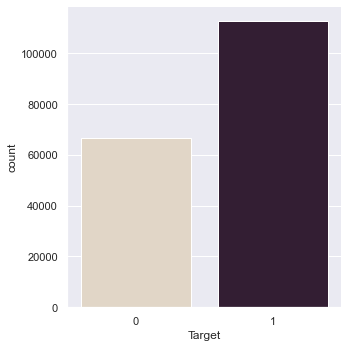

In [238]:
# Checking if our data is imbalanced

sns.catplot(x="Target", kind="count", palette="ch:.25", data=raw_data_no_label_encoded_cp)

We can clearly see the data is imbalanced so a data balancing technique should be considered in the model building

#### Model Building

Starting with **traditional models**

Splitting the data first into training and test set

In [239]:
# feature matrix
X = raw_data_no_label_encoded_cp.drop('Target', axis=1)

# target vector
y = raw_data_no_label_encoded_cp['Target']

#Splitting the data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, stratify=y)

#Where X_train is the training data and X_test is the test set

Standardizing and resampling the data

In [240]:
!pip install imblearn

You should consider upgrading via the 'C:\Users\User\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [258]:
from sklearn.preprocessing import StandardScaler
from imblearn.under_sampling import RandomUnderSampler

# standardize numerical variables
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)

# resample
rus = RandomUnderSampler()
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

We will use Cross-Validation for the modeling so as to achieve better results.The cross validate method divides our training data into k number of Folds, better utilizing the data than just splitting it into a train and test set. In this study, we'll perform 5-fold cross-validation with k= 5 as default

We will also use Accuracy and F1 score as our evaluation metrics

In [259]:
# define the function val_model
def crossval_model(X, y, clf, show=True):
   
    X = np.array(X)
    y = np.array(y)

    pipeline = make_pipeline(StandardScaler(), clf)
    scores = cross_val_score(pipeline, X, y, scoring='accuracy')

    if show == True:
        print(f'Accuracy: {scores.mean()}, {scores.std()}')

    
    return scores.mean()

In [263]:
#evaluate the models
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

LR = LogisticRegression()
NB = GaussianNB()
RF = RandomForestClassifier()
KNN = KNeighborsClassifier()
SVM = SVC(kernel='sigmoid')

model = []
accuracy = []

for clf in (LR, NB, RF, KNN, SVM):
    model.append(clf.__class__.__name__)
    accuracy.append(crossval_model(X_train_rus, y_train_rus, clf, show=True))

pd.DataFrame(data=accuracy, index=model, columns=['Accuracy'])

C:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

Accuracy: 0.9297417420176302, 0.0026166005605115813
Accuracy: 0.6439457639049507, 0.0011368644611554708
Accuracy: 0.9676132325213104, 0.001435671544641628
Accuracy: 0.7955721466659534, 0.0018499655233059776
Accuracy: 0.8112943524746473, 0.004548613696645225


Accuracy
LogisticRegression      0.929742
GaussianNB              0.643946
RandomForestClassifier  0.967613
KNeighborsClassifier    0.795572
SVC                     0.811294

In [262]:
model

['LogisticRegression',
 'GaussianNB',
 'RandomForestClassifier',
 'KNeighborsClassifier',
 'SVC']

These are their performances on the training data

Checking traditional models performance on **test set**

In [264]:
from sklearn.metrics import accuracy_score

#Predicting performance on test data
LR = LogisticRegression()
LR.fit(X_train_rus, y_train_rus)
X_test_LR = scaler.transform(X_test)
y_pred_LR = LR.predict(X_test_LR)
cm_LR = confusion_matrix(y_test, y_pred_LR)
print(cm_LR)
print("Logistic Regression : ", accuracy_score(y_test, y_pred_LR))

NB = GaussianNB()
NB.fit(X_train_rus, y_train_rus)
X_test_NB = scaler.transform(X_test)
y_pred_NB = NB.predict(X_test_NB)
cm_NB = confusion_matrix(y_test, y_pred_NB)
print(cm_NB)
print("Naive Bayes : ", accuracy_score(y_test, y_pred_NB))

RF = RandomForestClassifier()
RF.fit(X_train_rus, y_train_rus)
X_test_RF = scaler.transform(X_test)
y_pred_RF = RF.predict(X_test_RF)
cm_RF = confusion_matrix(y_test, y_pred_RF)
print(cm_RF)
print("Random Forest : ", accuracy_score(y_test, y_pred_RF))

KNN = KNeighborsClassifier()
KNN.fit(X_train_rus, y_train_rus)
X_test_KNN = scaler.transform(X_test)
y_pred_KNN = KNN.predict(X_test_KNN)
cm_KNN = confusion_matrix(y_test, y_pred_KNN)
print(cm_KNN)
print("KNN : ", accuracy_score(y_test, y_pred_KNN))

SVM = SVC()
SVM.fit(X_train_rus, y_train_rus)
X_test_SVM = scaler.transform(X_test)
y_pred_SVM = SVM.predict(X_test_SVM)
cm_SVM = confusion_matrix(y_test, y_pred_SVM)
print(cm_SVM)
print("SVM : ", accuracy_score(y_test, y_pred_SVM))

C:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


[[16617     5]
 [27965   222]]
Logistic Regression :  0.375795041174764


C:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


[[ 1290 15332]
 [  667 27520]]
Naive Bayes :  0.642951192840724


C:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


[[    0 16622]
 [    0 28187]]
Random Forest :  0.6290477359459037


C:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


[[ 8664  7958]
 [ 9435 18752]]
KNN :  0.6118413711531165


C:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


[[    0 16622]
 [    0 28187]]
SVM :  0.6290477359459037


**Summary**

The traditional models which seem to be doing well on the training data are actually when tested on the test data

In [136]:
!pip install xgboost

You should consider upgrading via the 'C:\Users\User\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


Building **AdaBoost** model comparable to XGBoost

In [265]:
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier

np.random.seed(1)

adb = AdaBoostClassifier()
xgb = XGBClassifier()

model = []
accuracy = []

for clf in (adb, xgb):
    model.append(clf.__class__.__name__)
    accuracy.append(crossval_model(X_train_rus, y_train_rus, clf, show=False))

pd.DataFrame(data=accuracy, index=model, columns=['Accuracy'])

Accuracy
AdaBoostClassifier  0.936580
XGBClassifier       0.978954

Performance on training data

In [267]:
# final LR model
adb  = AdaBoostClassifier()
adb.fit(X_train_rus, y_train_rus)
X_test_adb  = scaler.transform(X_test)
y_pred_adb  = adb.predict(X_test_adb)
cm_adb = confusion_matrix(y_test, y_pred_adb)
print(cm_adb)
print("AdaBoost : ", accuracy_score(y_test, y_pred_adb ))

xgb = XGBClassifier()
xgb.fit(X_train_rus, y_train_rus)
X_test_xgb  = scaler.transform(X_test)
y_pred_xgb  = xgb.predict(X_test_xgb)
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
print(cm_xgb)
print("XGBoost : ", accuracy_score(y_test, y_pred_xgb ))

C:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


[[    0 16622]
 [    0 28187]]
AdaBoost :  0.6290477359459037


C:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


[[    0 16622]
 [    0 28187]]
XGBoost :  0.6290477359459037


**Summary**

*    On the defaults parameters level the boosting algorithms are way no different in performance than the traditional models. 
*    However, Adaboost performance will be enhanced by tuning its hyperparameters

In [119]:
!pip install keras

     ---------------------------------------- 1.6/1.6 MB 238.2 kB/s eta 0:00:00


You should consider upgrading via the 'C:\Users\User\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [122]:
!pip install tensorflow

     ------------------------------------ 444.1/444.1 MB 440.3 kB/s eta 0:00:00
     -------------------------------------- 42.6/42.6 KB 172.0 kB/s eta 0:00:00
     ---------------------------------------- 3.5/3.5 MB 3.5 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 57.5/57.5 KB 1.5 MB/s eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 1.9 MB/s eta 0:00:00
     -------------------------------------- 123.4/123.4 KB 1.0 MB/s eta 0:00:00
     ---------------------------------------- 65.5/65.5 KB 1.2 MB/s eta 0:00:00
     ---------------------------------------- 5.8/5.8 MB 3.2 MB/s eta 0:00:00
     ---------------------------------------- 14.2/14.2 MB 3.1 MB/s eta 0:00:00
     -------------------------------------- 438.7/438.7 KB 2.3 MB/s eta 0:00:00
     ---------------------------------------- 2.6/2.6 MB 2.7 MB/s eta 0:00:00
     ---------------------

You should consider upgrading via the 'C:\Users\User\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [246]:
X_train_rus.shape

(99732, 160)

#### ANN Model

Cross validation will not be used with ANN since the data is alot and will take a long time to train

In [252]:
#Baseline model
    
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.metrics import accuracy_score

def create_model(X_train, y_train):
    # create model
    model = Sequential()
    
    #input layer / First hidden layer
    model.add(Dense(80, input_dim=160,kernel_initializer='random_normal', activation='relu'))
    
    # Second Hidden layer
    model.add(Dense(80,kernel_initializer='random_normal', activation='relu'))
    
    #output layer
    model.add(Dense(1,kernel_initializer='random_normal', activation='sigmoid'))
    
    # Compile model
    opt = keras.optimizers.Adam(learning_rate=0.01)
    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

    model.fit(X_train, y_train, epochs=100, batch_size=512)
    
    return model

In [255]:
np.random.seed(42)

model = create_model(X_train_rus,y_train_rus)

#Making predictions on the test data
X_test_ann = scaler.transform(X_test)

y_pred_ann = model.predict(X_test_ann)
y_pred_ann = (y_pred_ann > 0.5)

#print("ANN : ", accuracy_score(y_test, y_pred_ann ))

#Confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_ann)
print(cm)

print("ANN : ", accuracy_score(y_test, y_pred_ann ))
#print(accuracy)

Epoch 1/100
195/195 [==============================] - 1s 3ms/step - loss: 0.2113 - accuracy: 0.9075
Epoch 2/100
195/195 [==============================] - 1s 3ms/step - loss: 0.1283 - accuracy: 0.9465
Epoch 3/100
195/195 [==============================] - 1s 3ms/step - loss: 0.1136 - accuracy: 0.9521
Epoch 4/100
195/195 [==============================] - 1s 3ms/step - loss: 0.1019 - accuracy: 0.9577
Epoch 5/100
195/195 [==============================] - 1s 3ms/step - loss: 0.0962 - accuracy: 0.9600
Epoch 6/100
195/195 [==============================] - 1s 4ms/step - loss: 0.0908 - accuracy: 0.9624
Epoch 7/100
195/195 [==============================] - 1s 3ms/step - loss: 0.0865 - accuracy: 0.9643
Epoch 8/100
195/195 [==============================] - 1s 3ms/step - loss: 0.0824 - accuracy: 0.9662
Epoch 9/100
195/195 [==============================] - 1s 3ms/step - loss: 0.0797 - accuracy: 0.9674
Epoch 10/100
195/195 [==============================] - 1s 3ms/step - loss: 0.0768 - accura